In [9]:
import pandas as pd

file_path = 'AmesHousing.csv'
data = pd.read_csv(file_path)

#Отобразить основную информацию о наборе данных и первых нескольких строках
data_info = data.info()
data_description = data.describe()

# Показать первые несколько строк набора данных и основную статистику
data.head(), data_info, data_description

# Покажем столбцы и их типы, чтобы получить представление о том, какие еще функции можно описать
data.columns, data.dtypes



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

(Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
        'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
        'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
        'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
        'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
        'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
        'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
        'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
        'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
        'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
        '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
        'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
        'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
        'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Y

In [15]:
# Посмотрим, сколько пропущенных значений в каждом столбце
missing_values = data.isnull().sum()

# Для удобства выведем только те столбцы, где есть пропущенные значения
missing_values = missing_values[missing_values > 0]
missing_values


Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

In [31]:
# I. Удаляем признаки с большим количеством пропусков
columns_to_drop = ['Alley', 'Pool QC', 'Fence', 'Misc Feature']
data_cleaned = data.drop(columns=columns_to_drop)

# II. Заполняем пропуски в числовых признаках медианой
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_cols:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].median())

# III. Заполняем пропуски в категориальных признаках модой
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
for column in categorical_cols:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mode()[0])

# Проверим, остались ли пропуски
missing_after_cleaning = data_cleaned.isnull().sum().sum()
missing_after_cleaning

0

In [33]:
#Проверка оставшихся пропусков
missing_after_cleaning = data_cleaned.isnull().sum()
missing_after_cleaning = missing_after_cleaning[missing_after_cleaning > 0]
print(missing_after_cleaning)

#Общая информация о данных после очистки
data_cleaned.info()

Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 78 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2930 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   ob

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

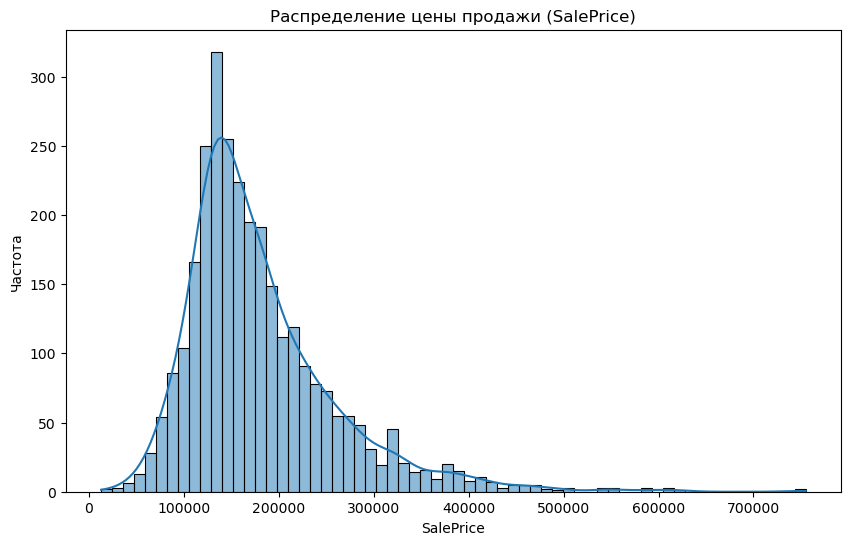

In [36]:
# Визуализация распределения целевой переменной (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['SalePrice'], kde=True)
plt.title('Распределение цены продажи (SalePrice)')
plt.xlabel('SalePrice')
plt.ylabel('Частота')
plt.show()

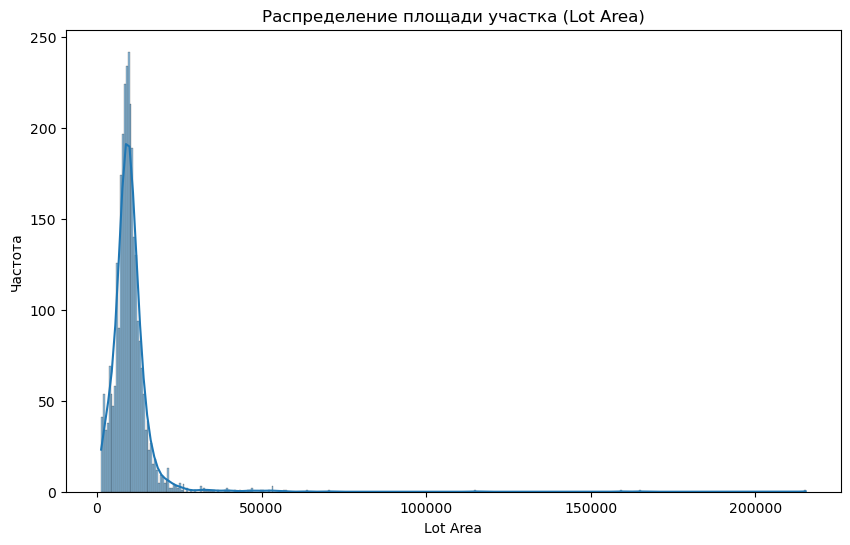

In [39]:
# Визуализация распределения признака Lot Area
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Lot Area'], kde=True)
plt.title('Распределение площади участка (Lot Area)')
plt.xlabel('Lot Area')
plt.ylabel('Частота')
plt.show()

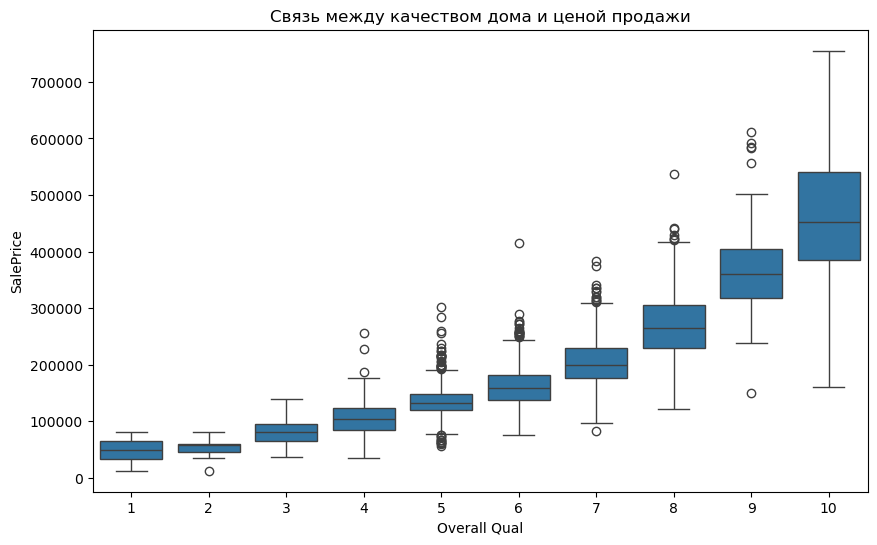

In [41]:
# Boxplot для оценки связи между качеством дома и ценой продажи
plt.figure(figsize=(10, 6))
sns.boxplot(x='Overall Qual', y='SalePrice', data=data_cleaned)
plt.title('Связь между качеством дома и ценой продажи')
plt.xlabel('Overall Qual')
plt.ylabel('SalePrice')
plt.show()

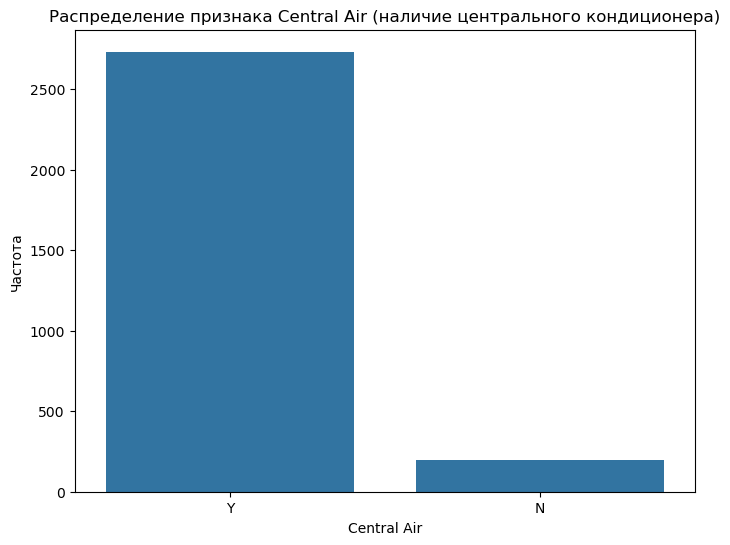

In [43]:
# Countplot для категориального признака Central Air
plt.figure(figsize=(8, 6))
sns.countplot(x='Central Air', data=data_cleaned)
plt.title('Распределение признака Central Air (наличие центрального кондиционера)')
plt.xlabel('Central Air')
plt.ylabel('Частота')
plt.show()

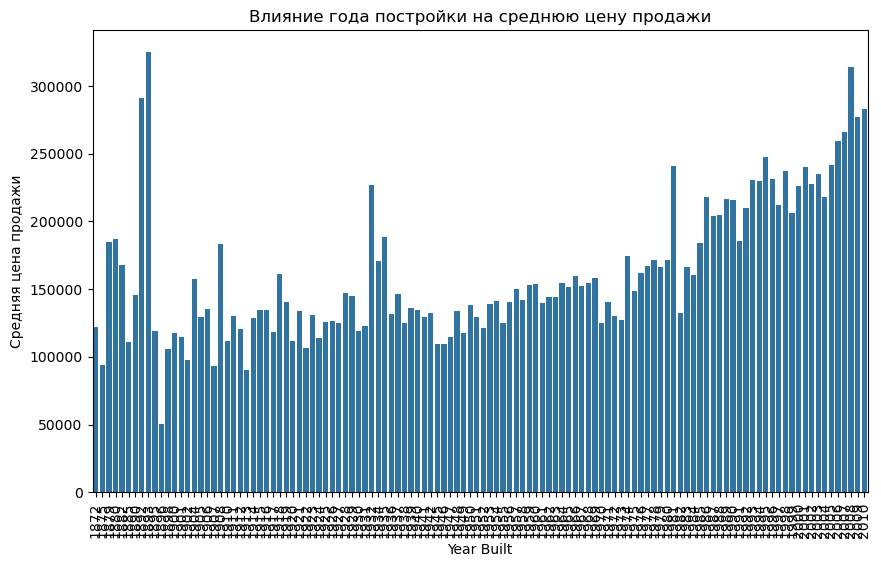

In [51]:
# Barplot для визуализации влияния года постройки на среднюю цену продажи
plt.figure(figsize=(10, 6))
sns.barplot(x='Year Built', y='SalePrice', data=data_cleaned, errorbar=None)
plt.xticks(rotation=90)
plt.title('Влияние года постройки на среднюю цену продажи')
plt.xlabel('Year Built')
plt.ylabel('Средняя цена продажи')
plt.show()

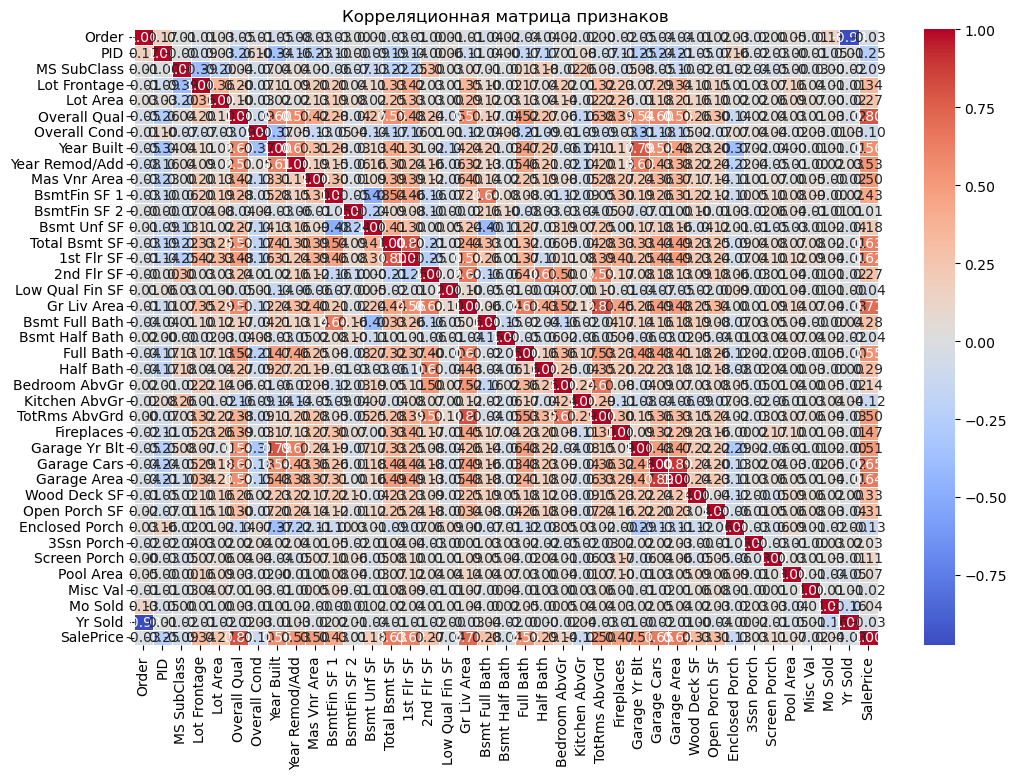

In [73]:
# 1. Удаление признаков с большим количеством пропусков
columns_to_drop = ['Alley', 'Pool QC', 'Fence', 'Misc Feature']
data_cleaned = data.drop(columns=columns_to_drop)

# 2. Заполнение пропусков в числовых признаках медианой
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_cols:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].median())

# 3. Заполнение пропусков в категориальных признаках модой
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
for column in categorical_cols:
    data_cleaned[column] = data_cleaned[column].fillna(data_cleaned[column].mode()[0])

# 4. Исключаем категориальные признаки перед расчетом корреляционной матрицы
data_numeric = data_cleaned.select_dtypes(include=['float64', 'int64'])

# 5. Построим матрицу корреляций для числовых признаков и визуализируем ее с помощью тепловой карты
plt.figure(figsize=(12, 8))
corr_matrix = data_numeric.corr()

# Визуализируем корреляционную матрицу
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Корреляционная матрица признаков')
plt.show()


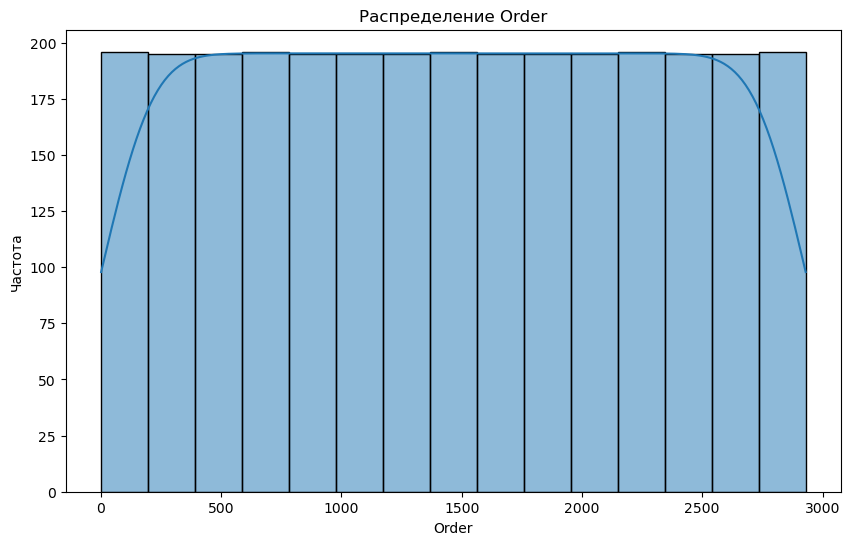

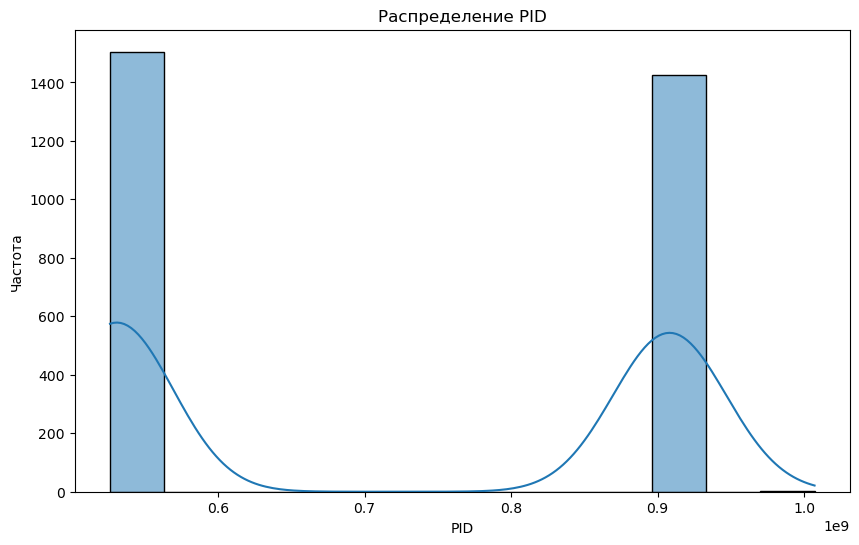

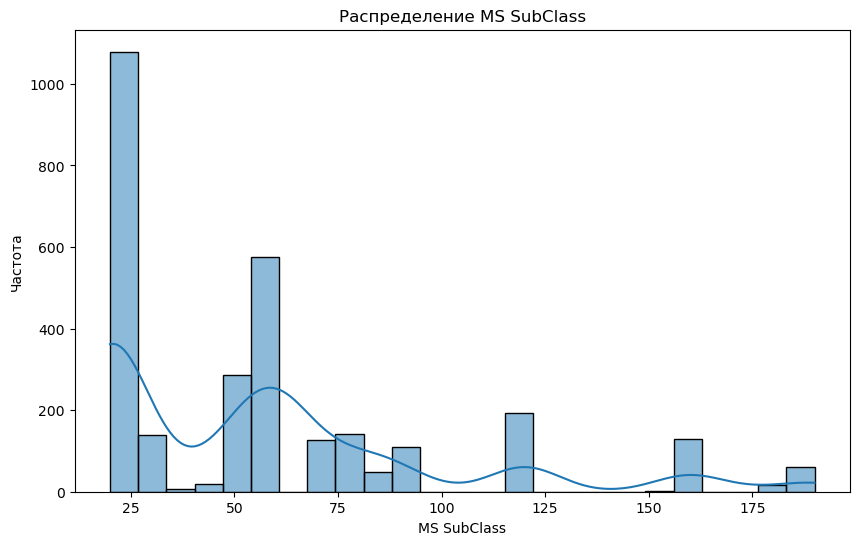

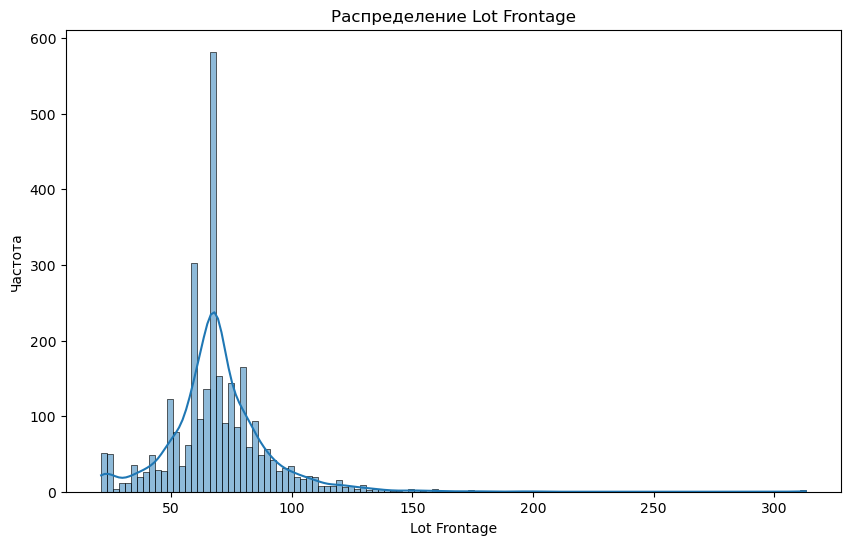

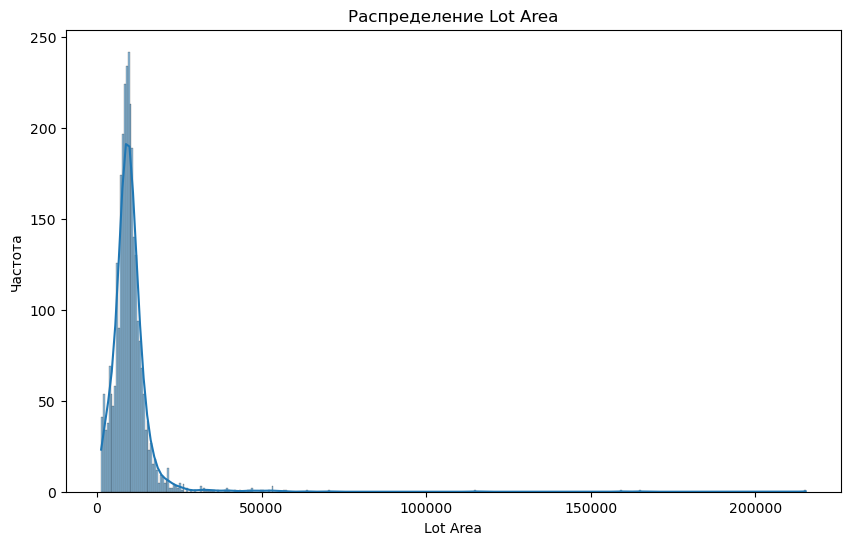

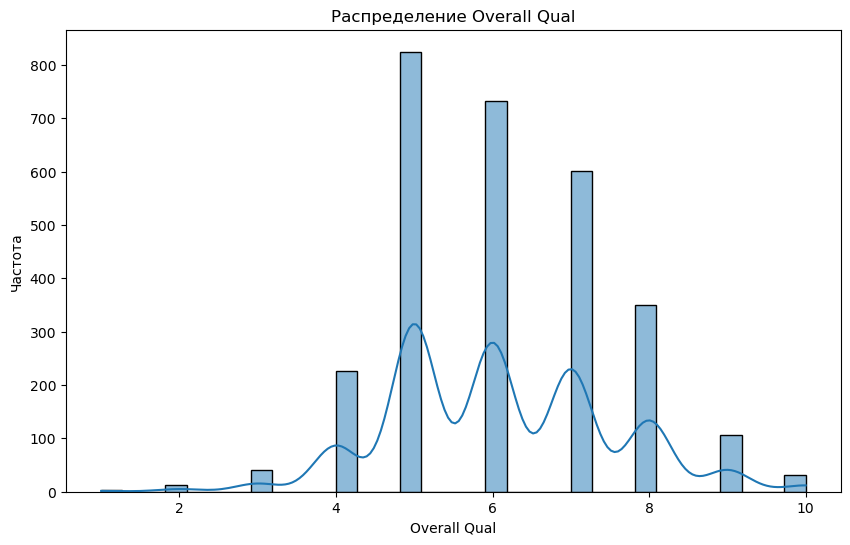

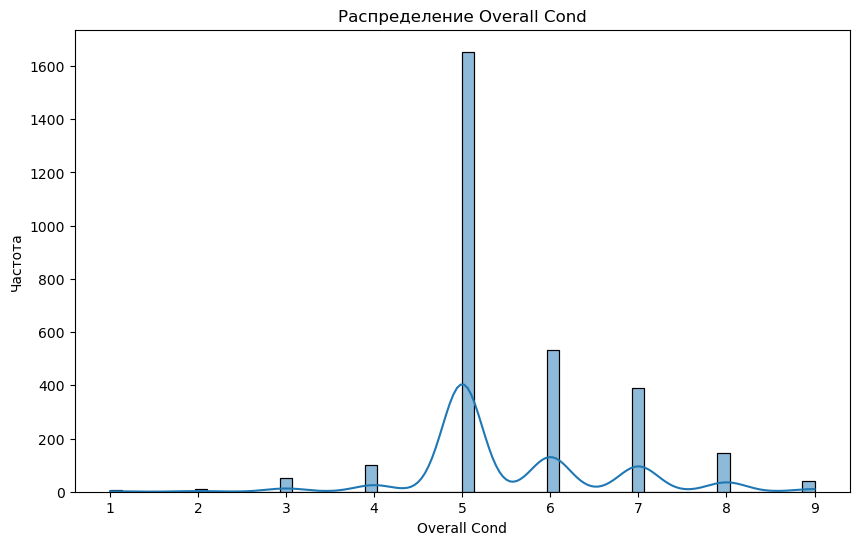

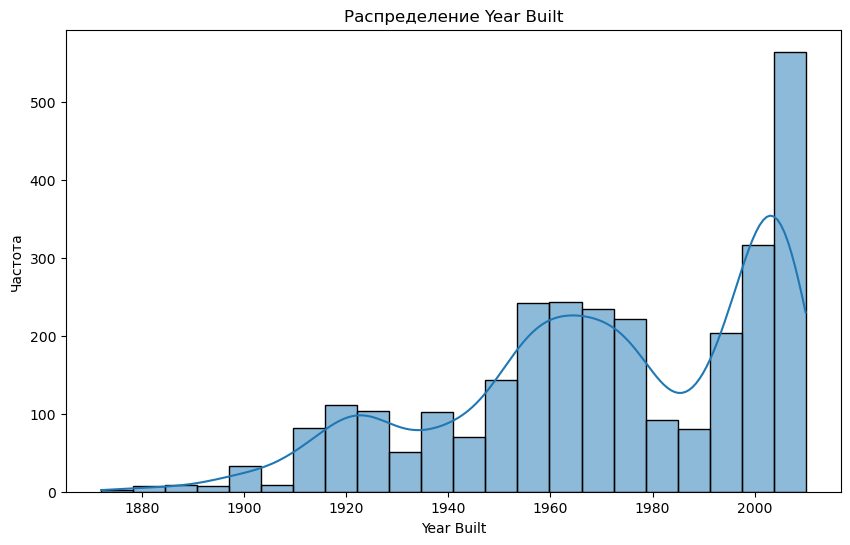

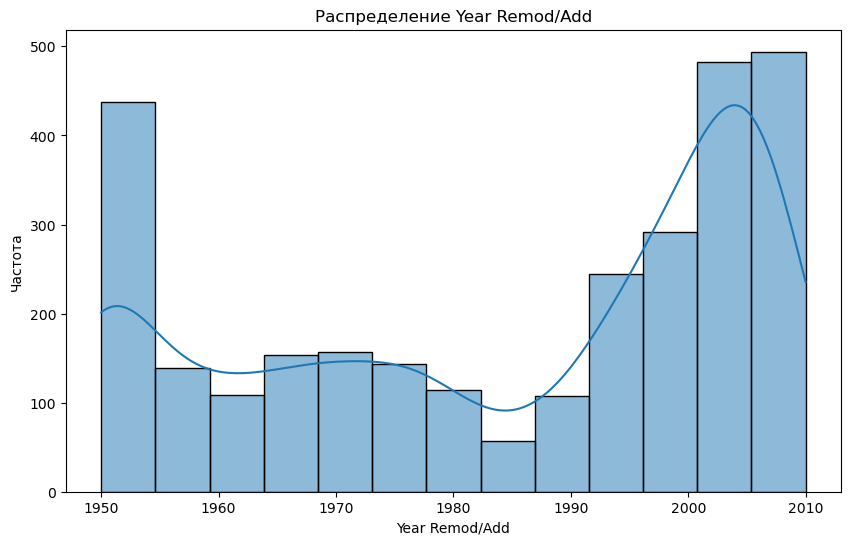

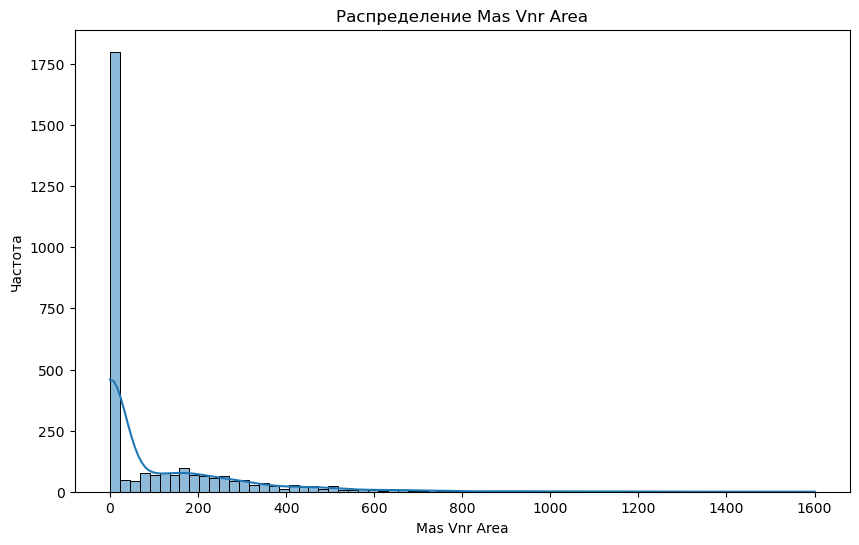

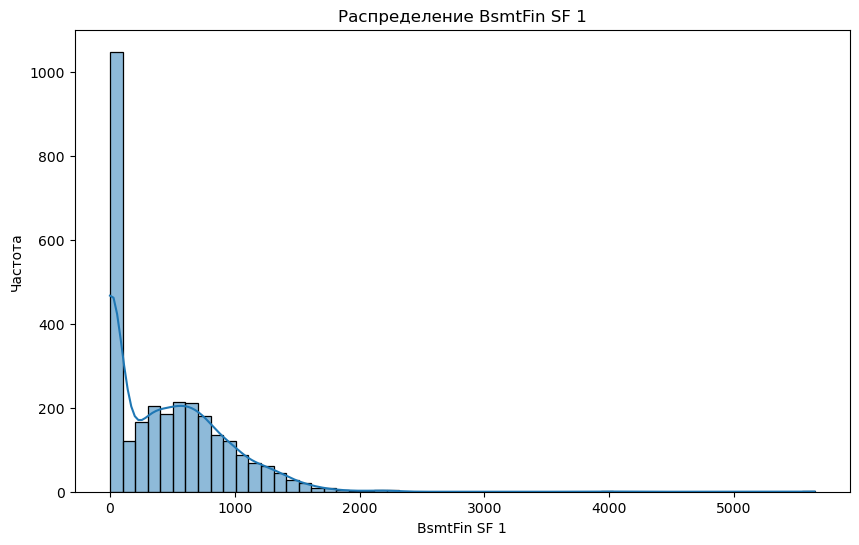

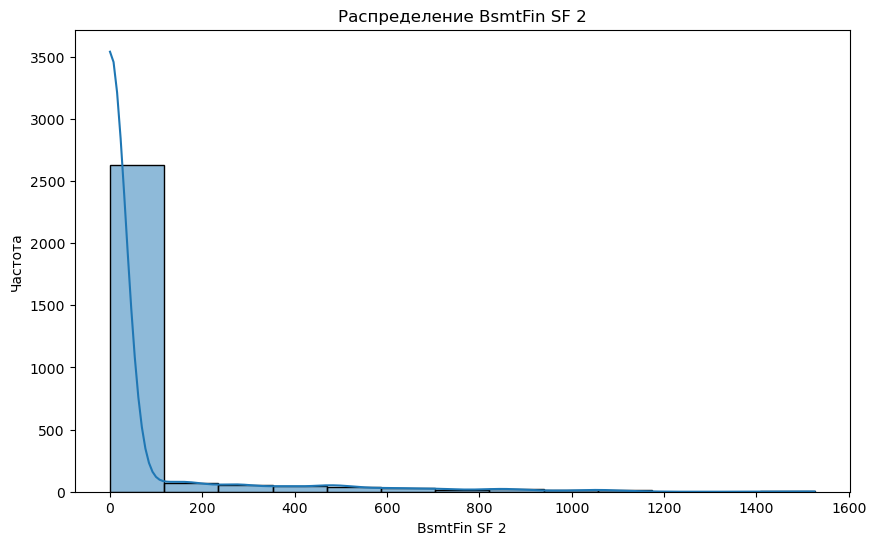

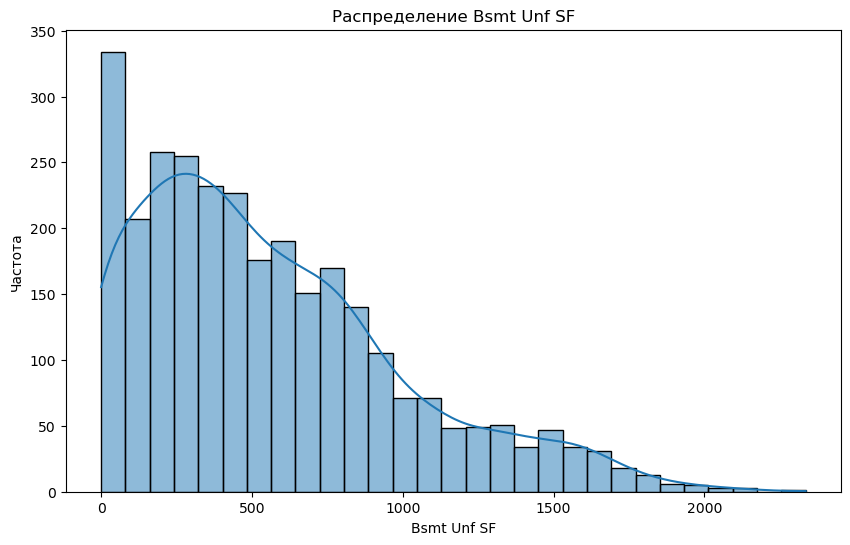

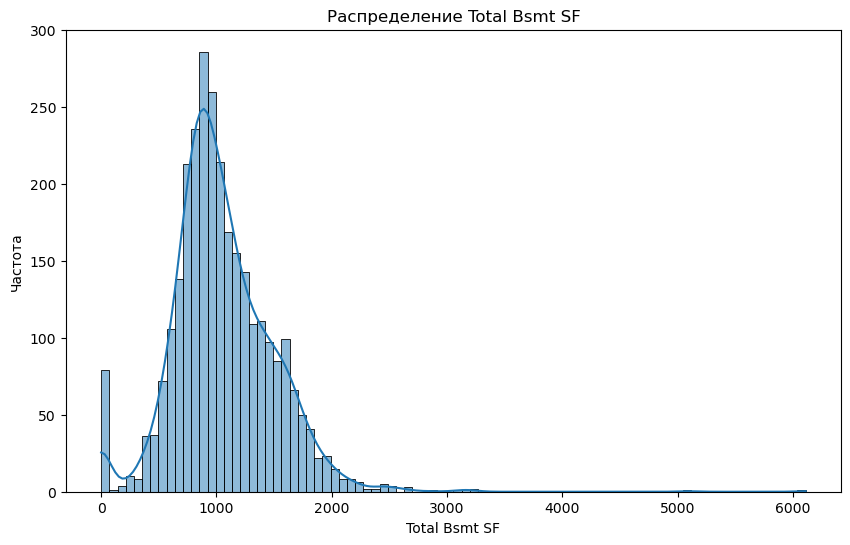

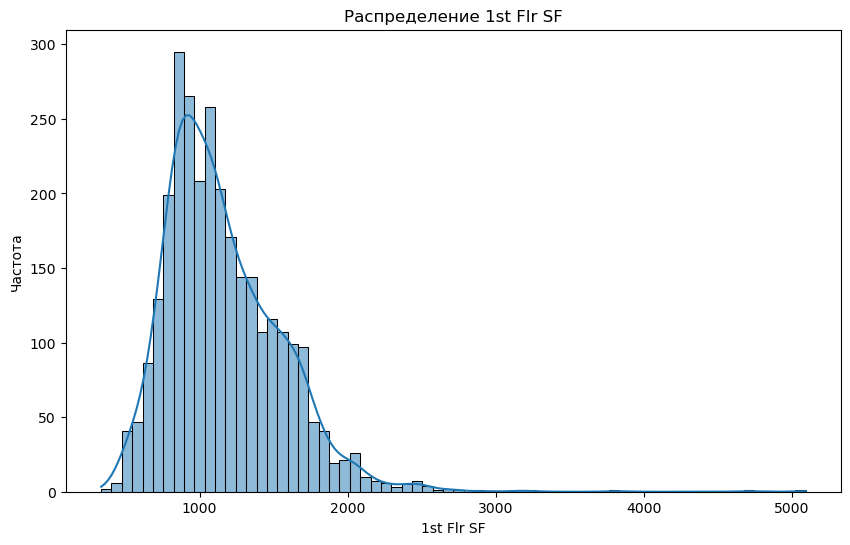

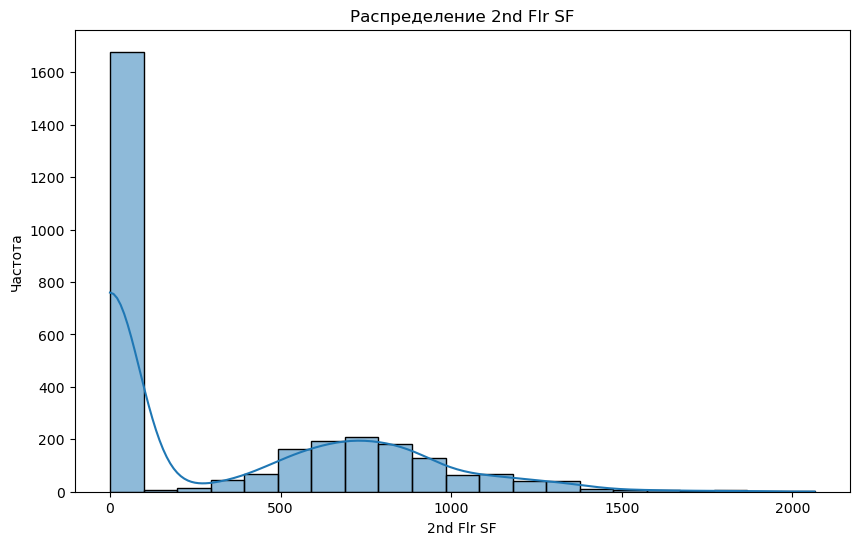

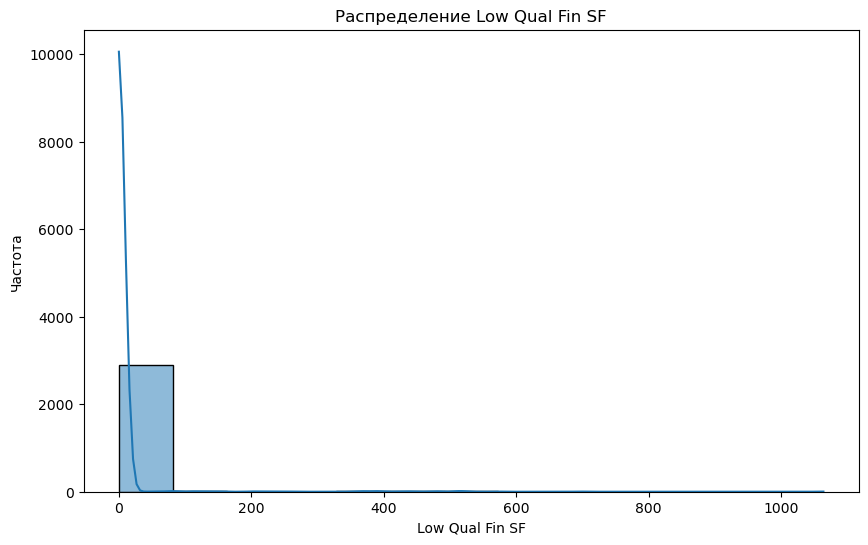

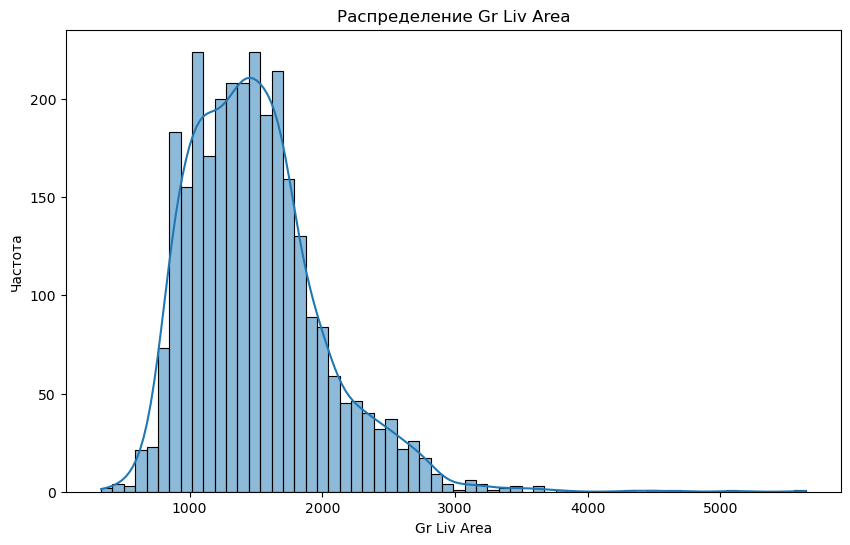

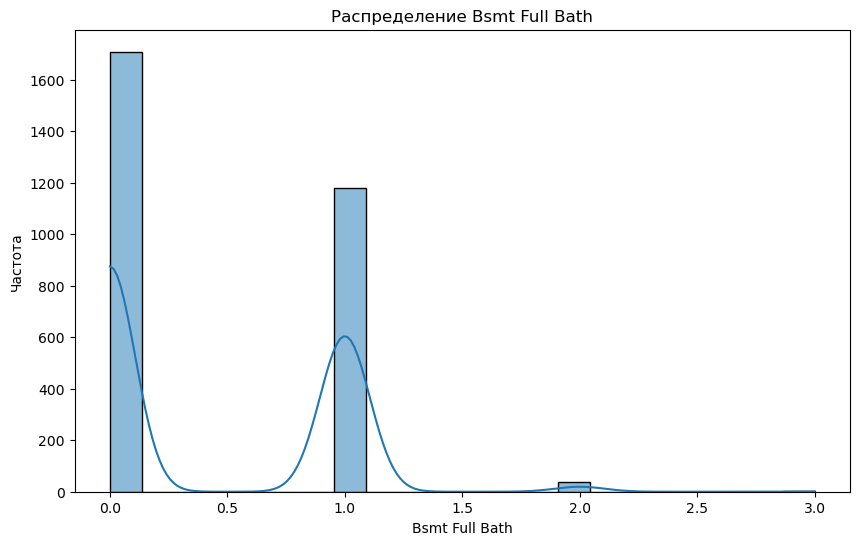

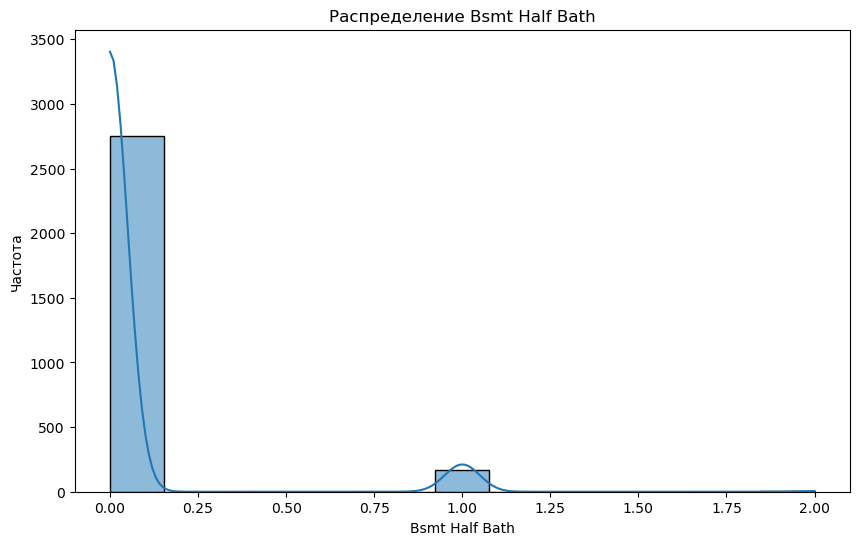

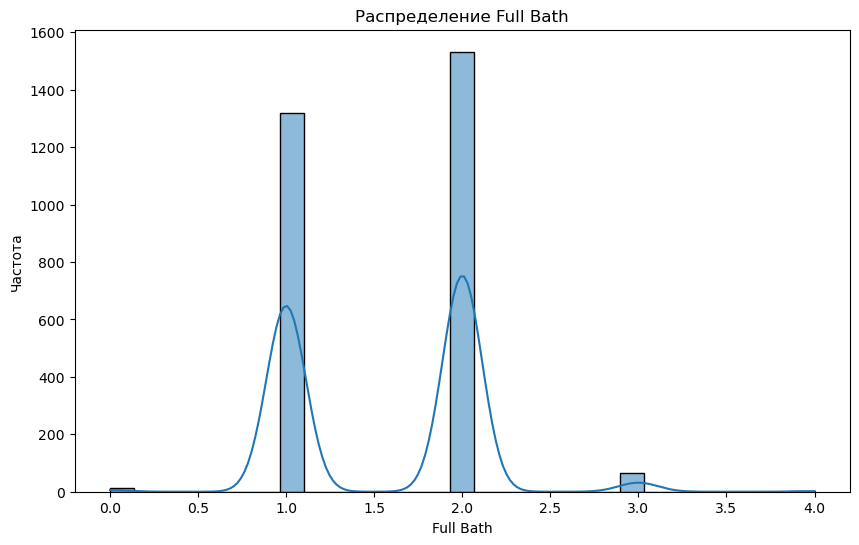

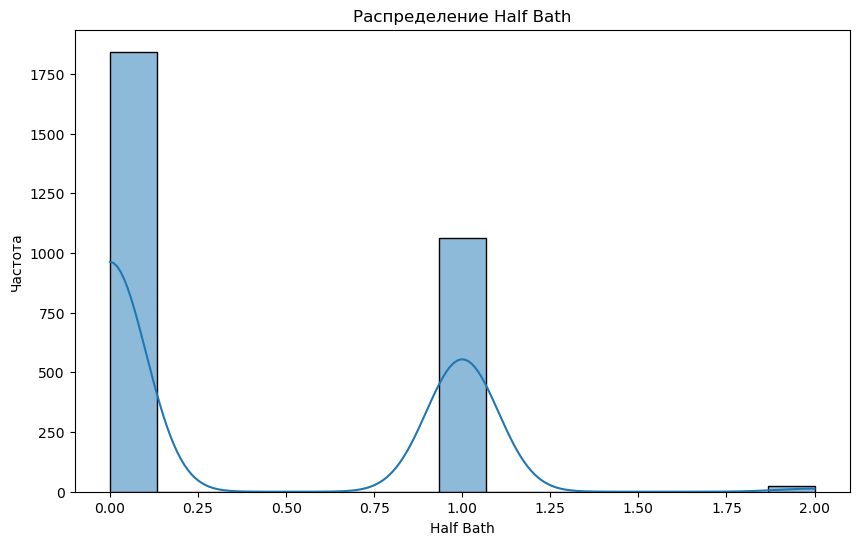

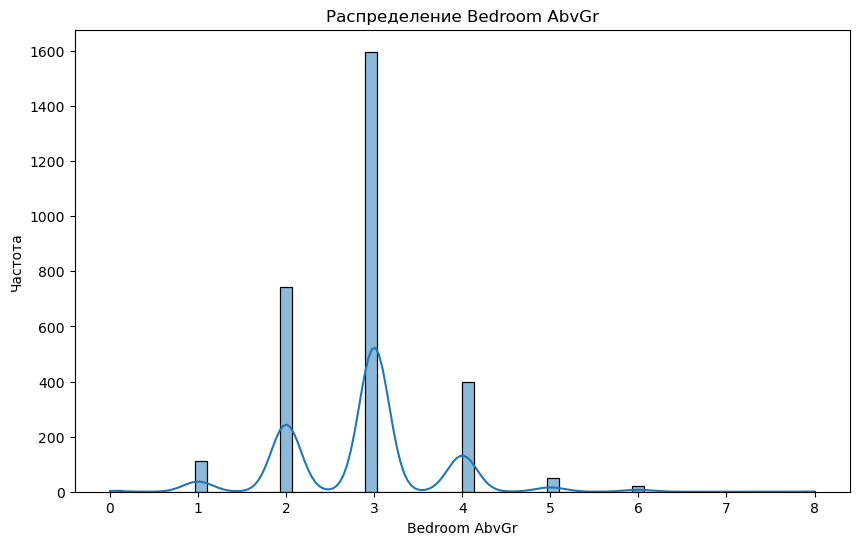

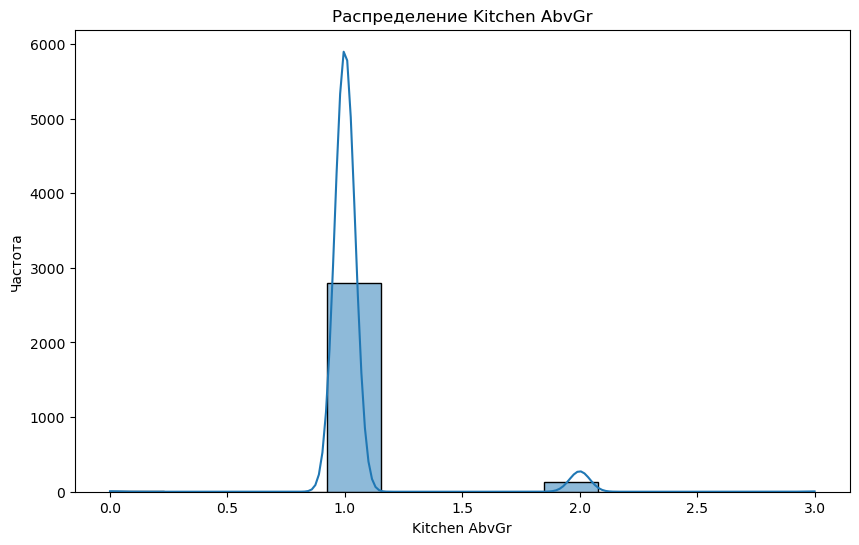

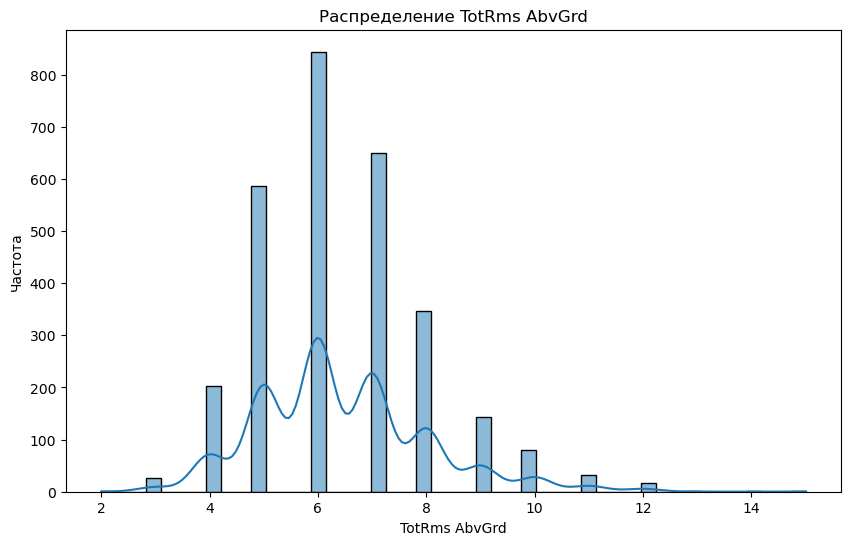

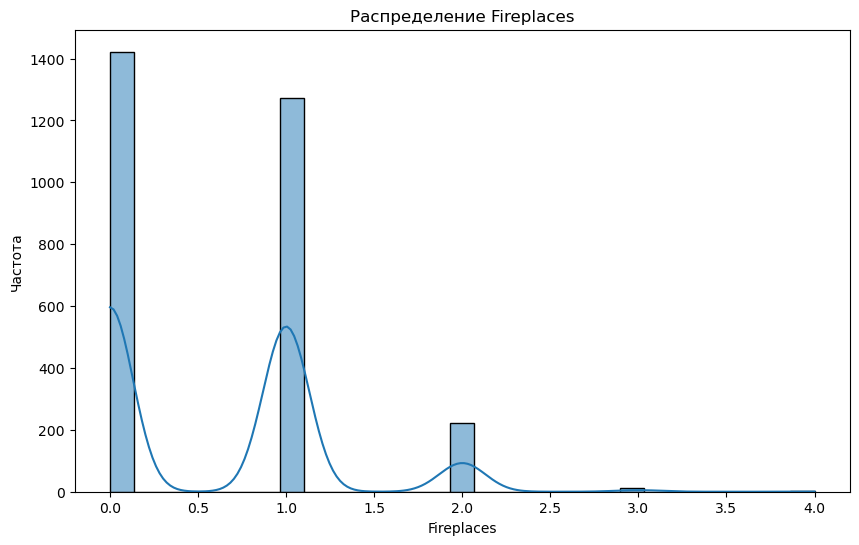

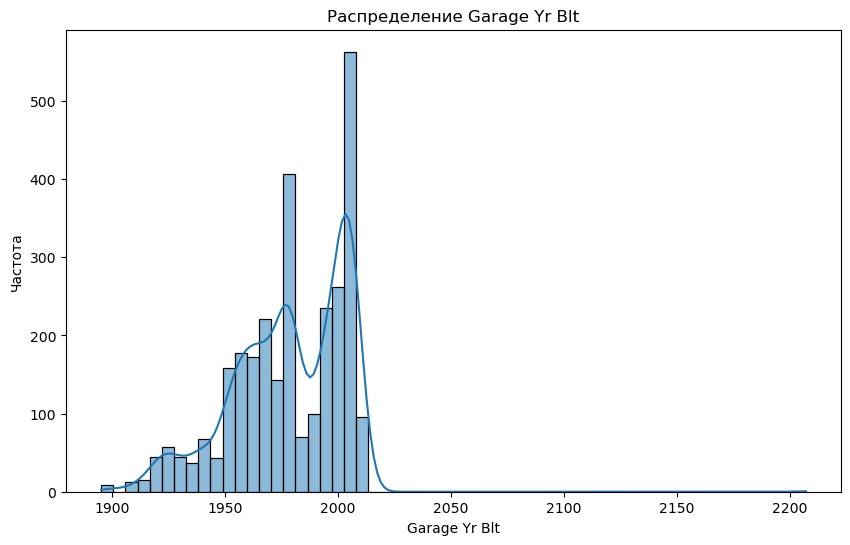

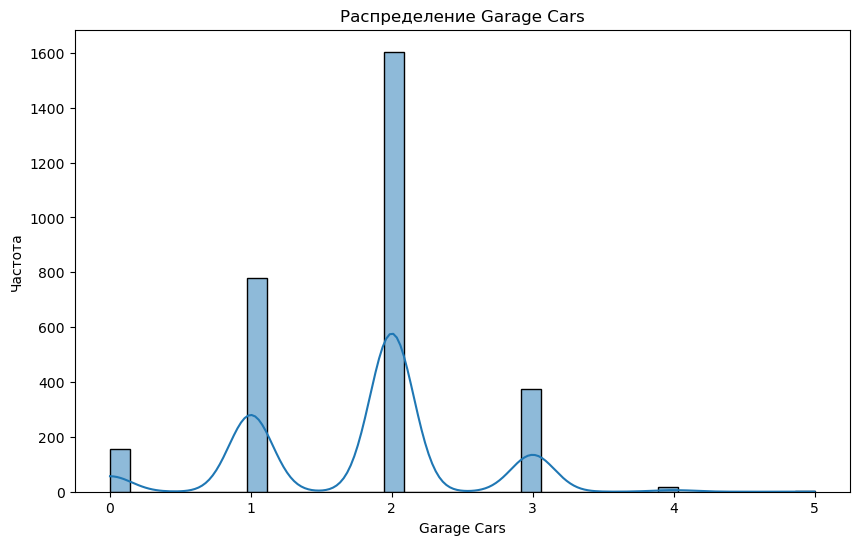

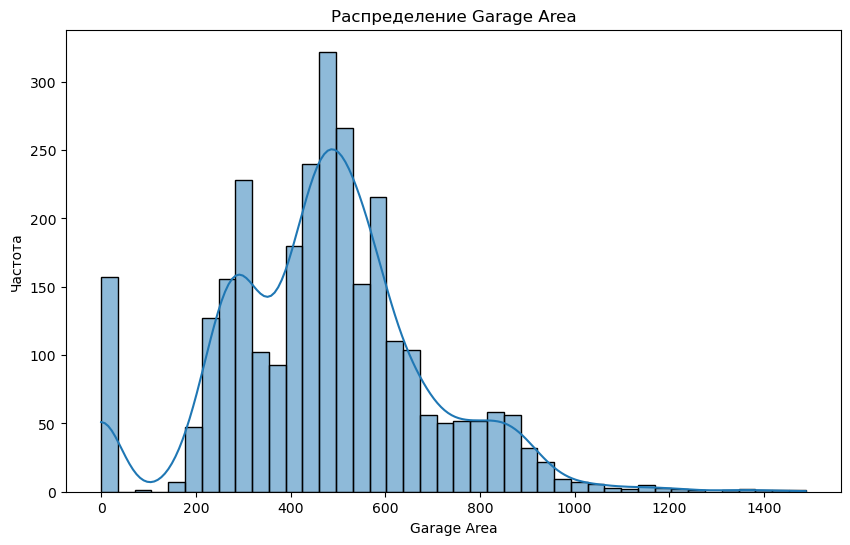

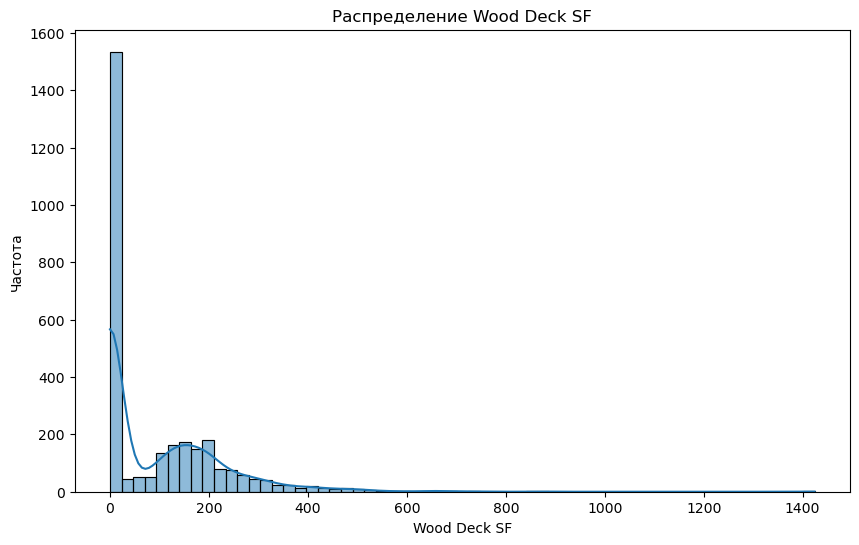

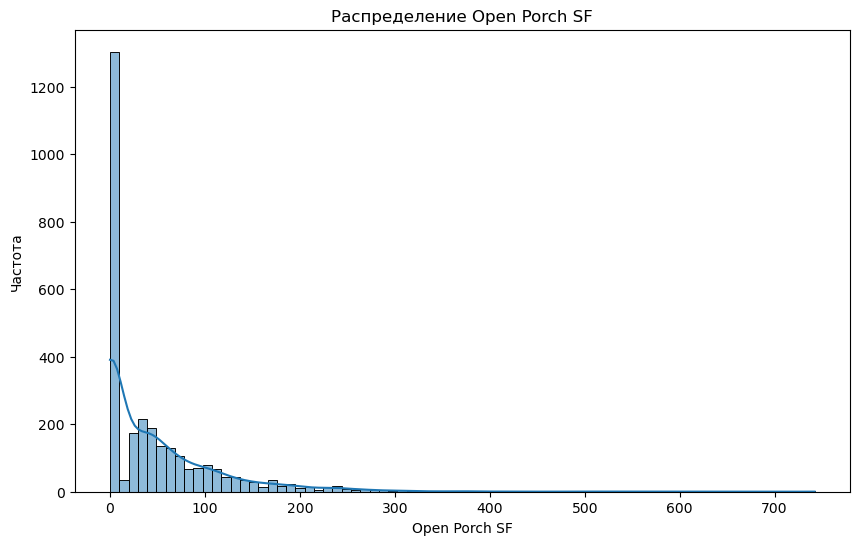

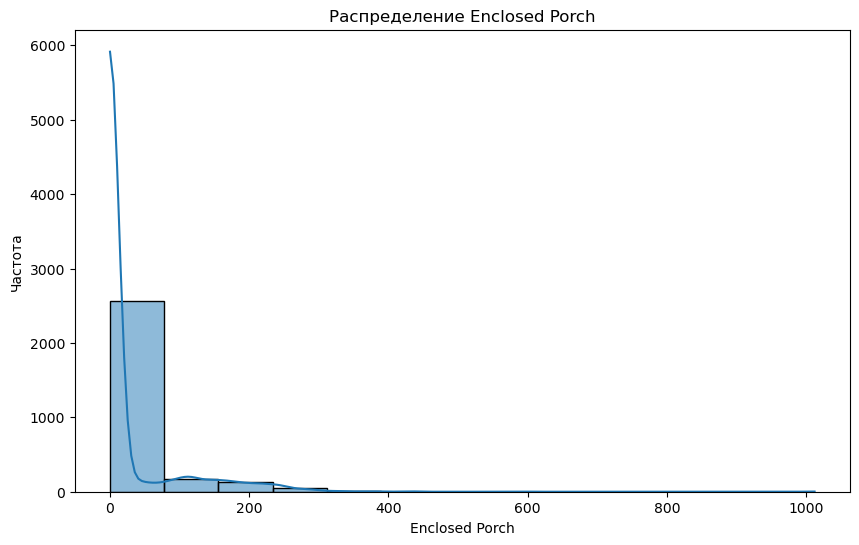

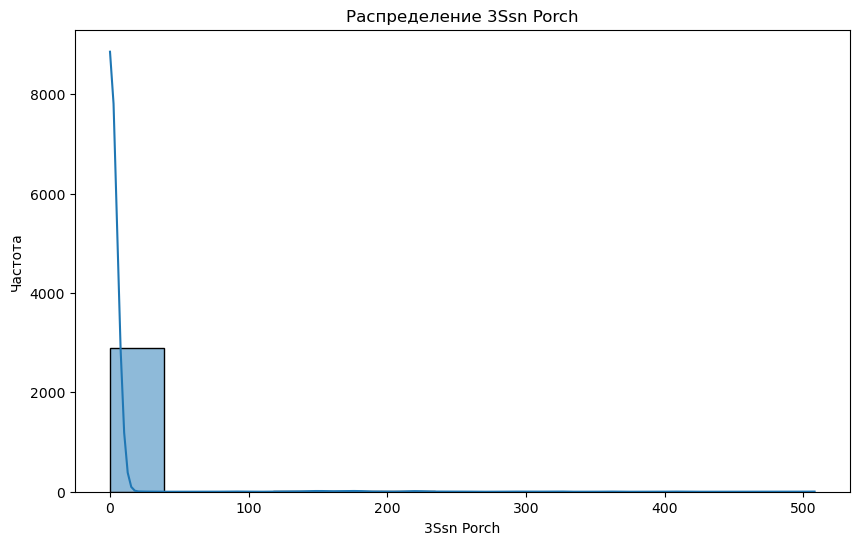

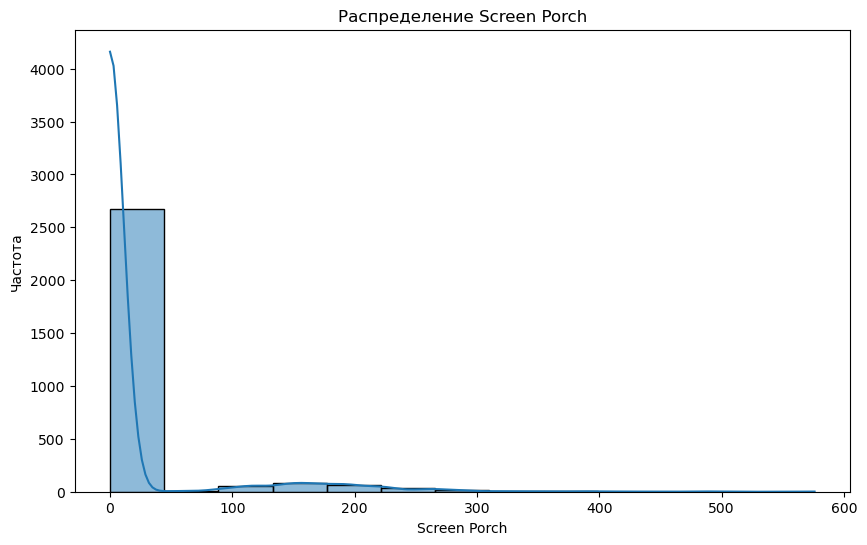

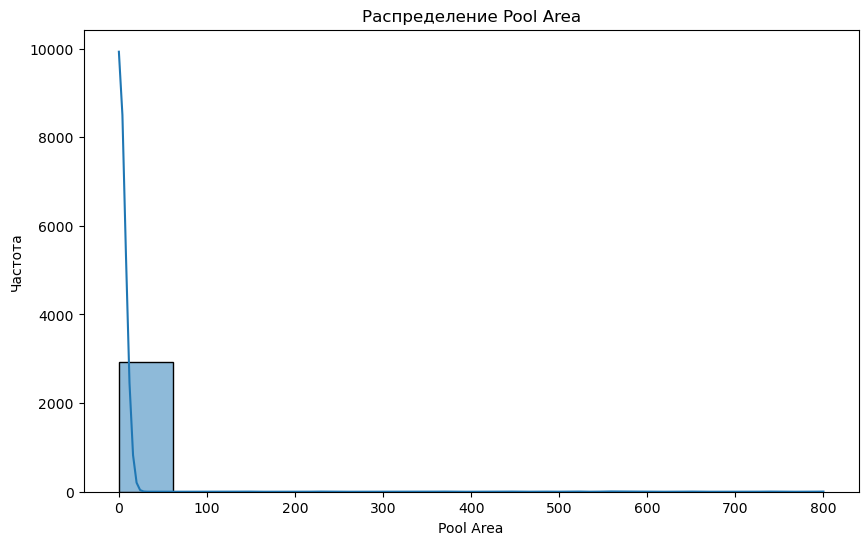

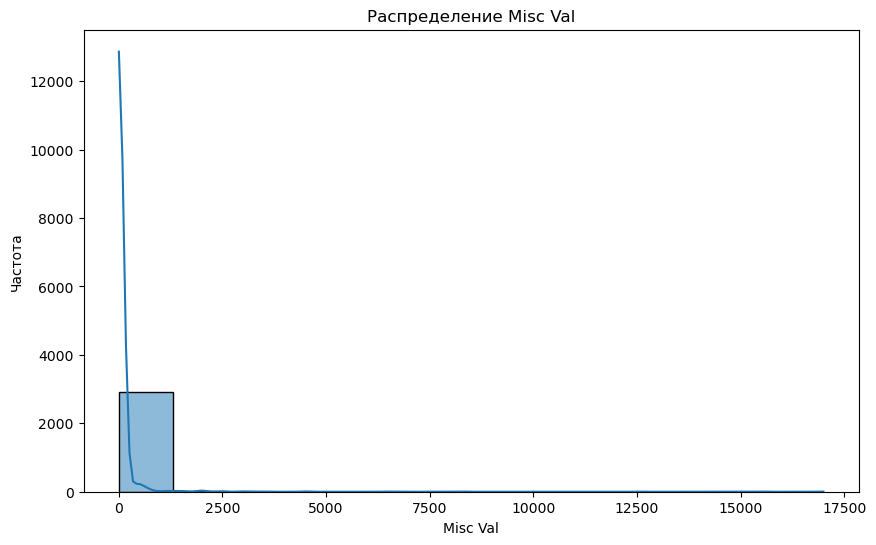

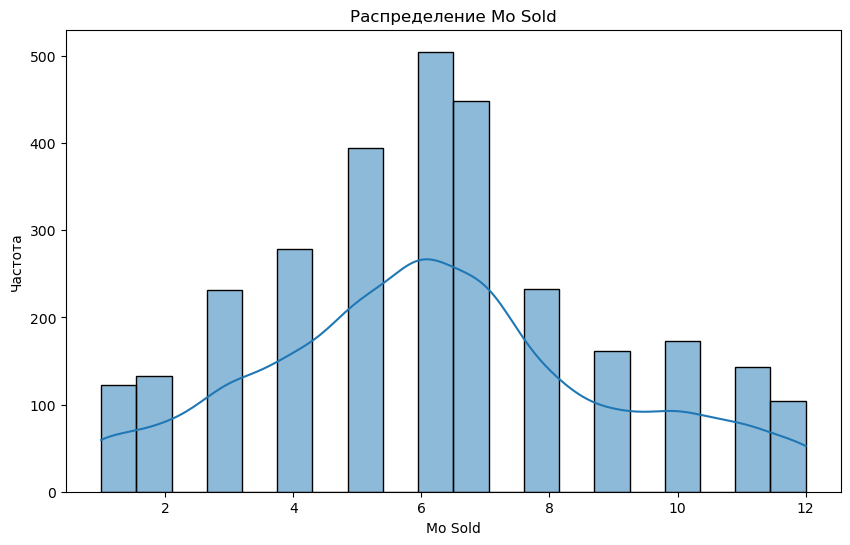

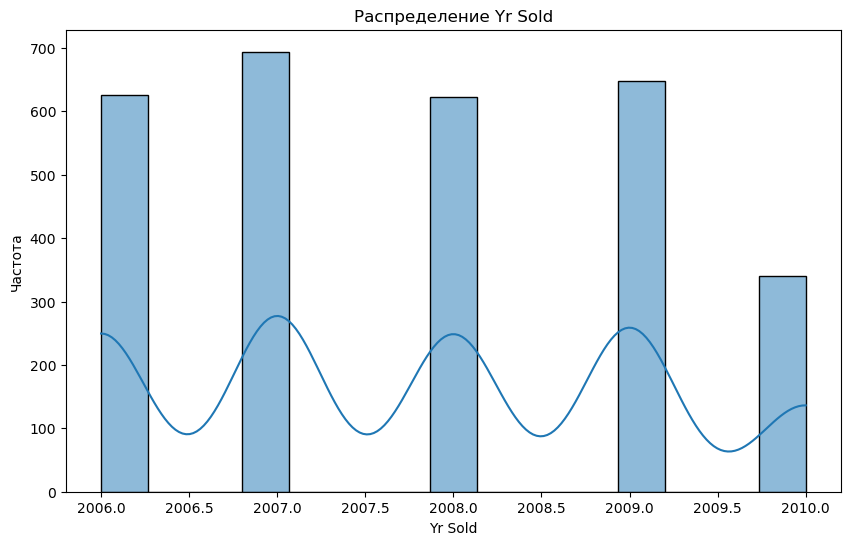

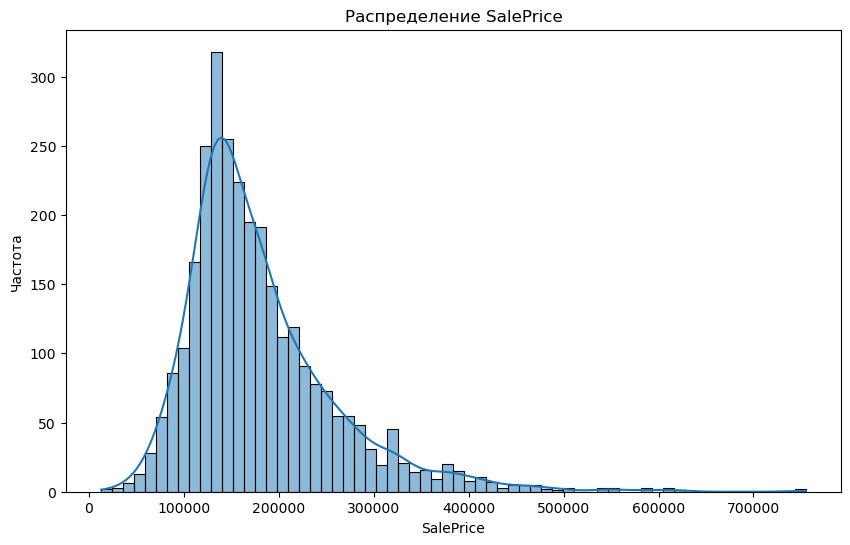

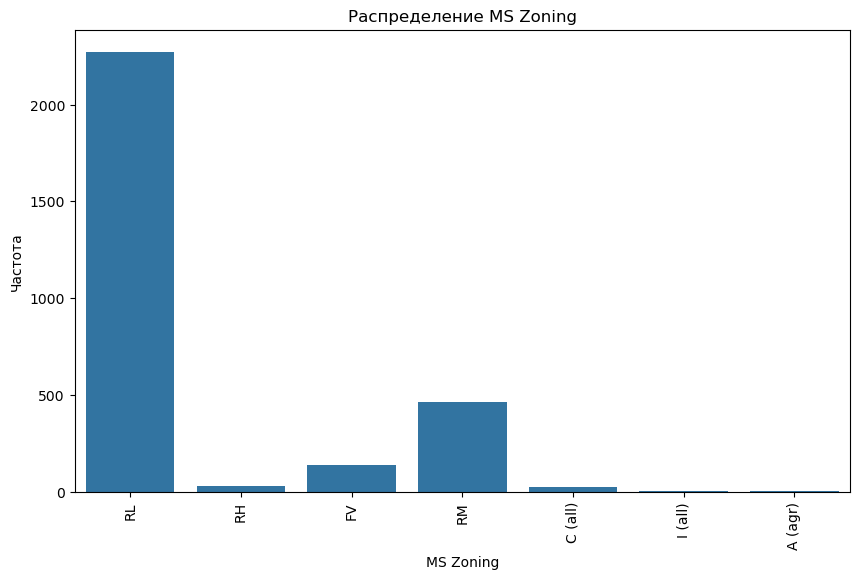

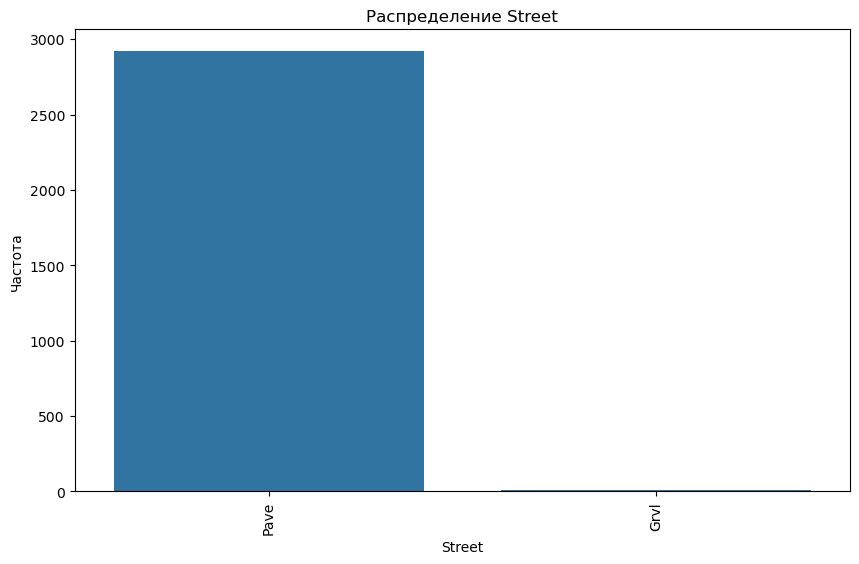

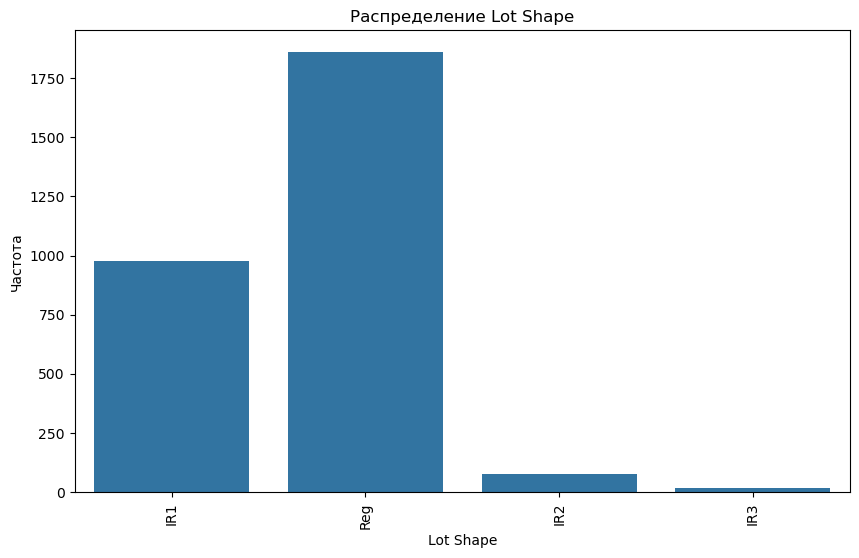

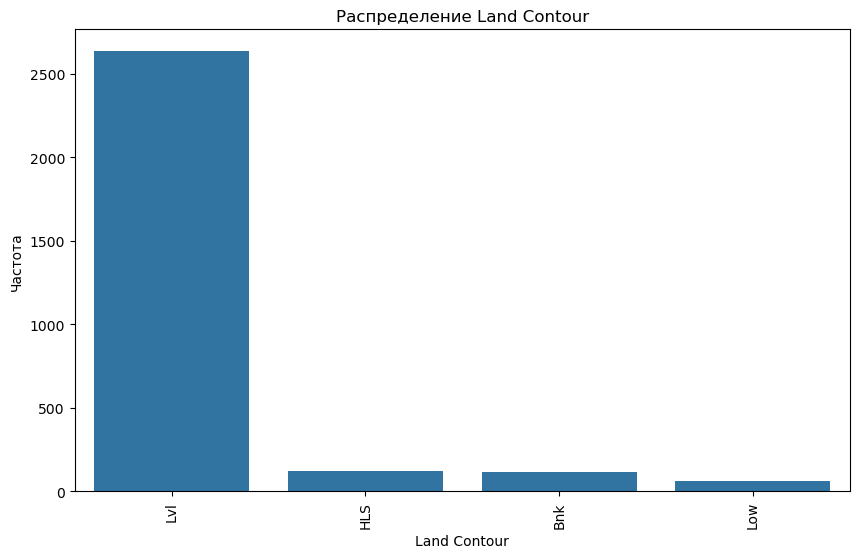

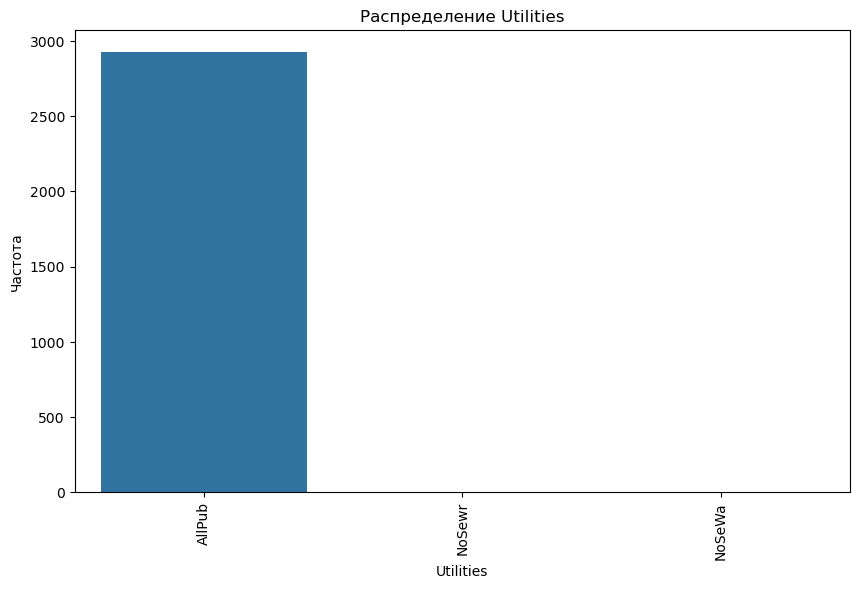

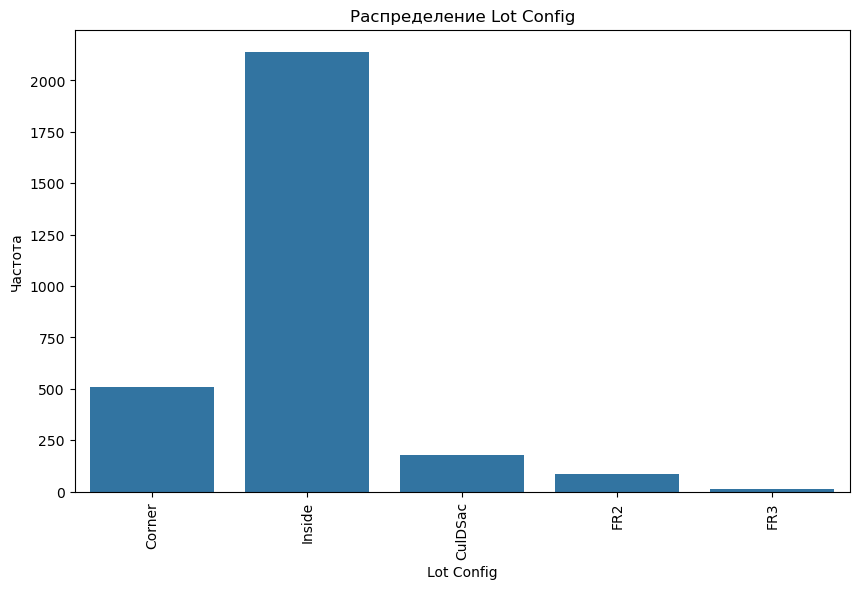

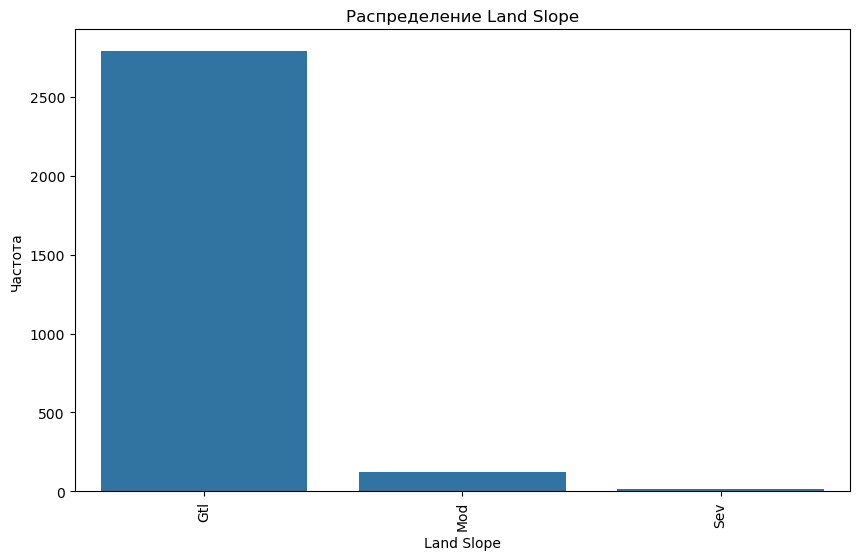

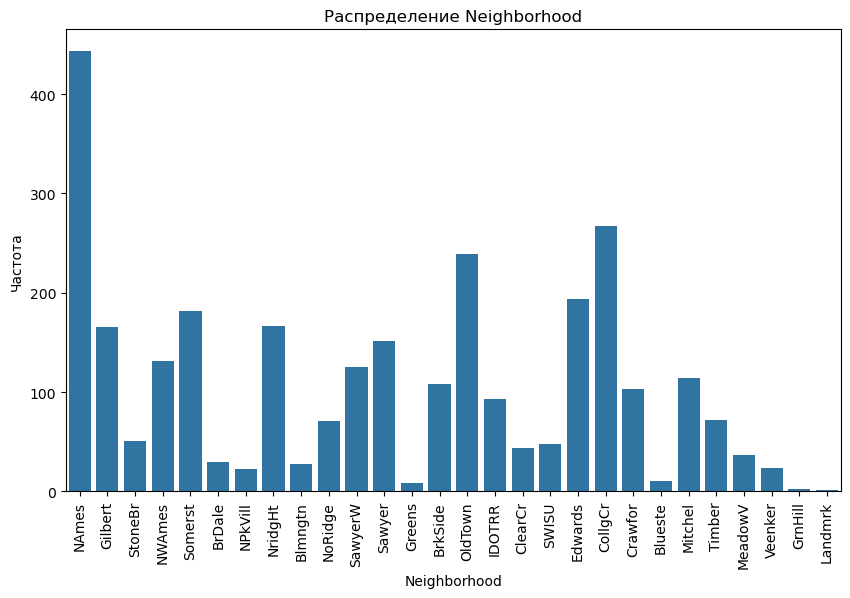

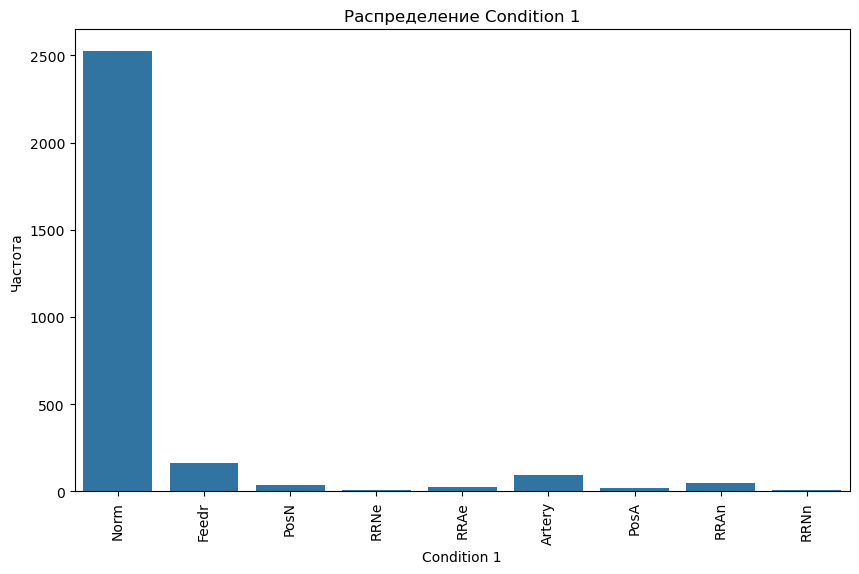

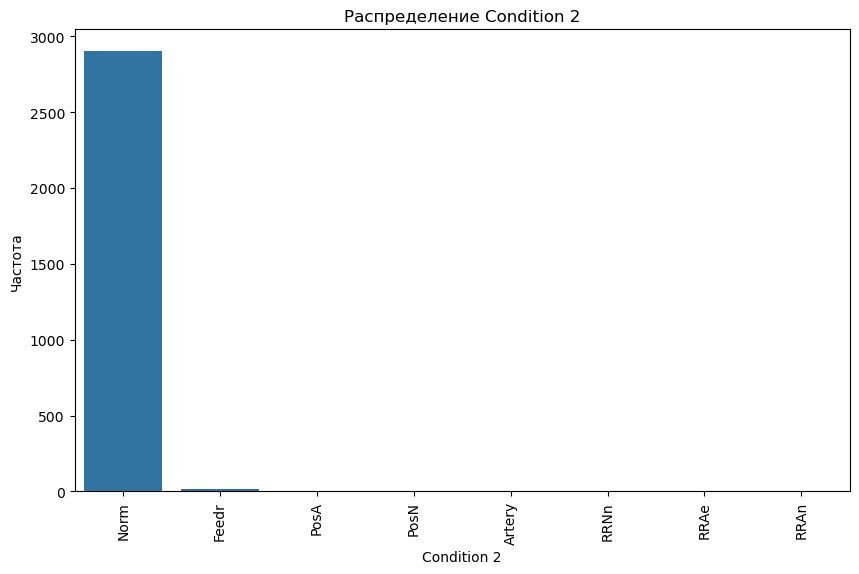

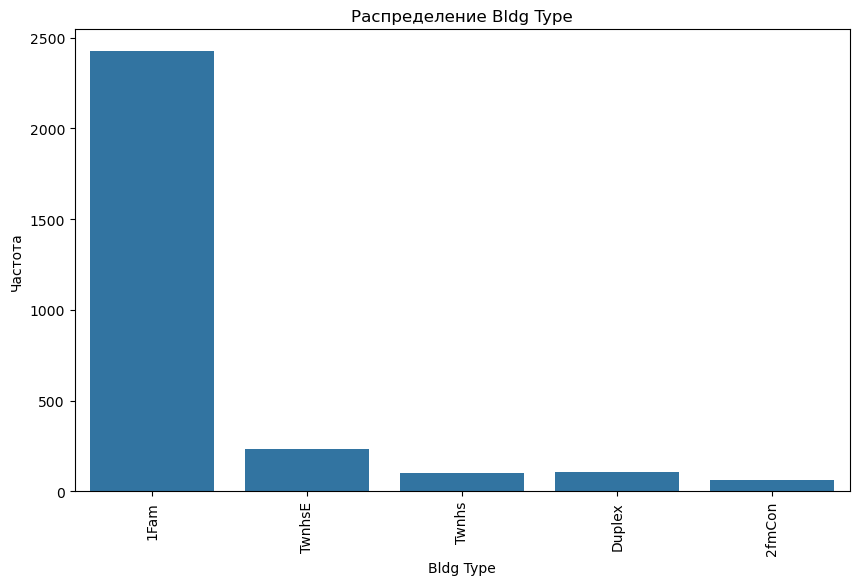

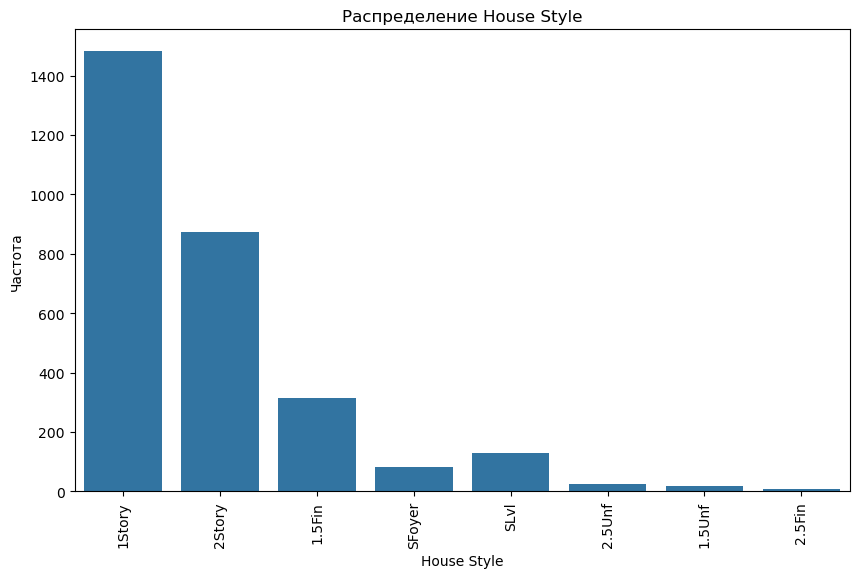

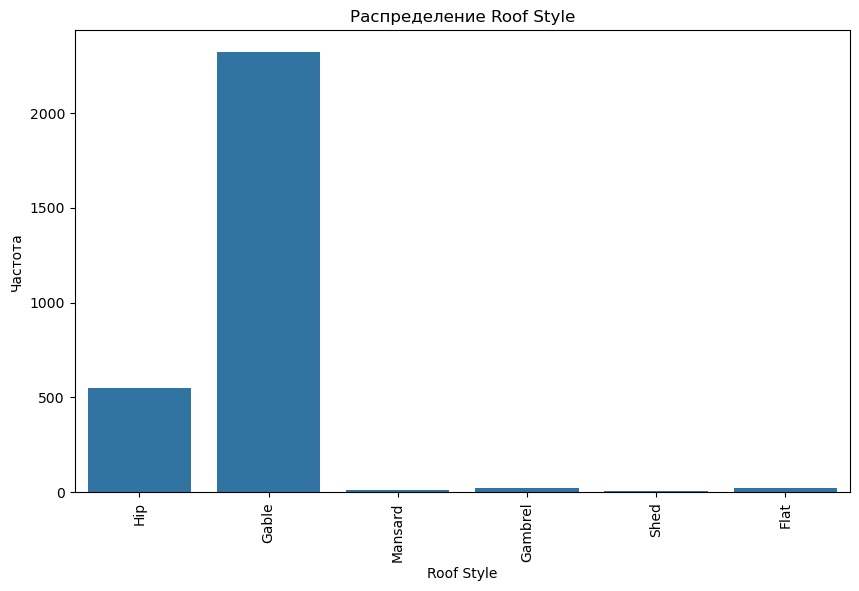

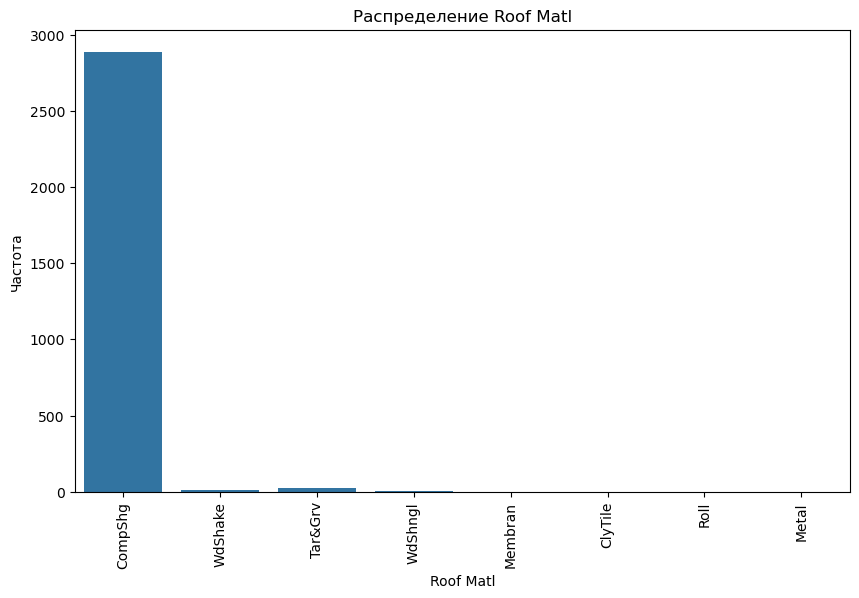

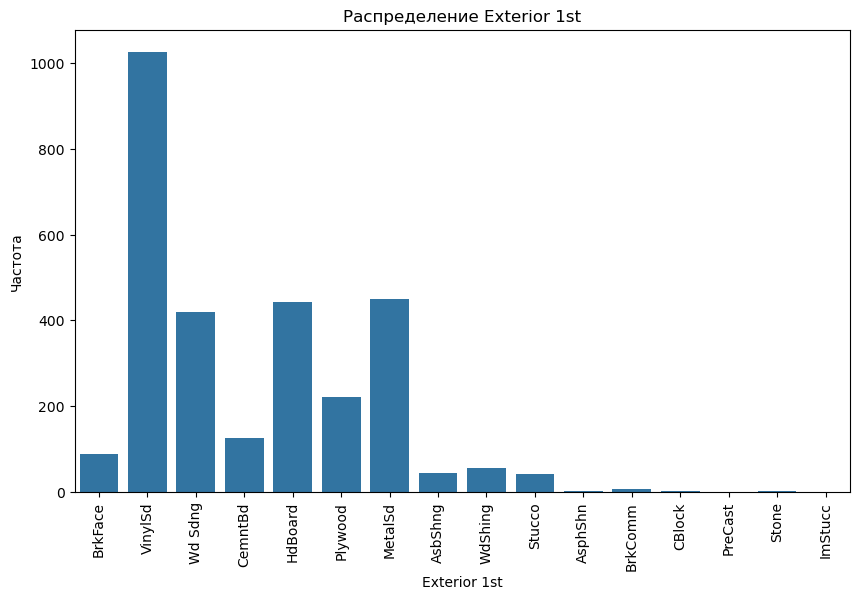

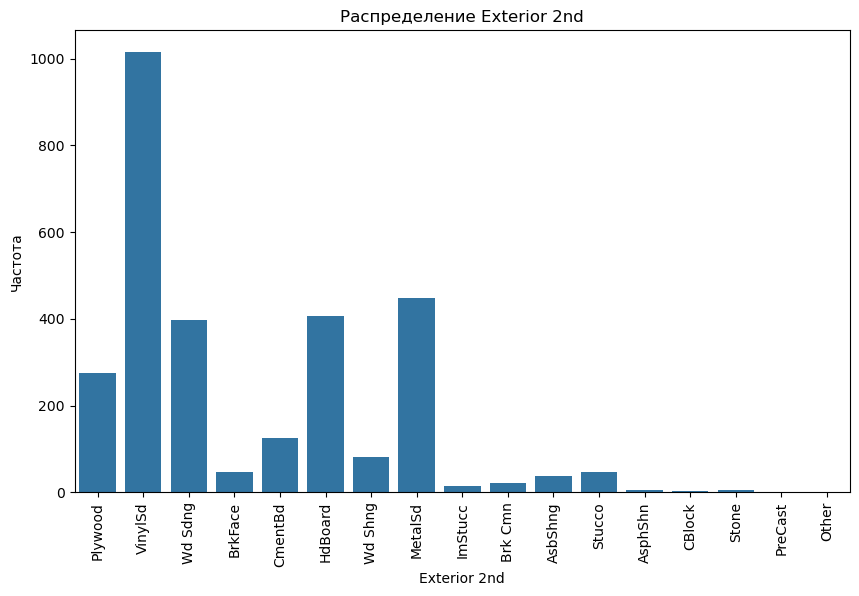

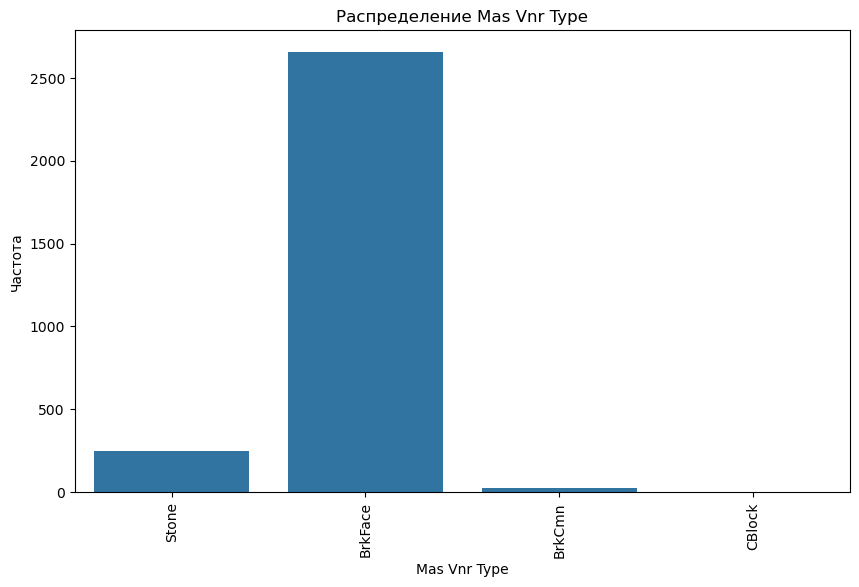

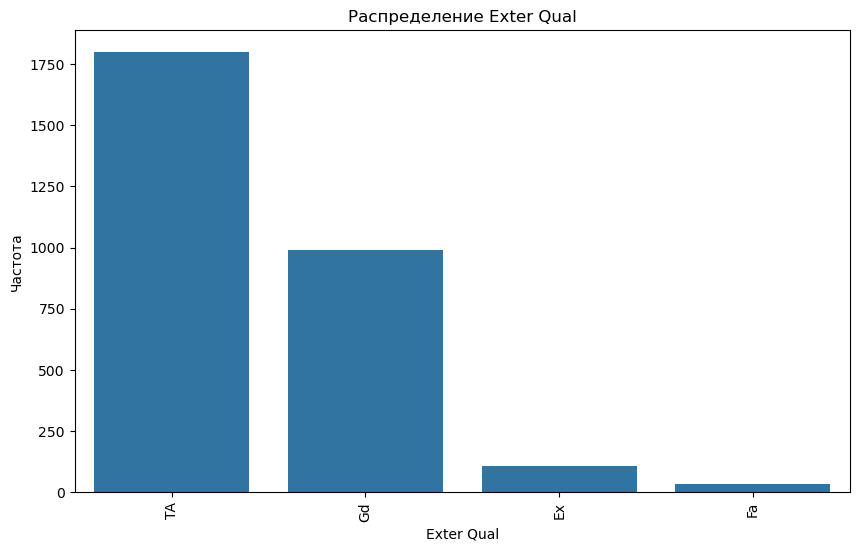

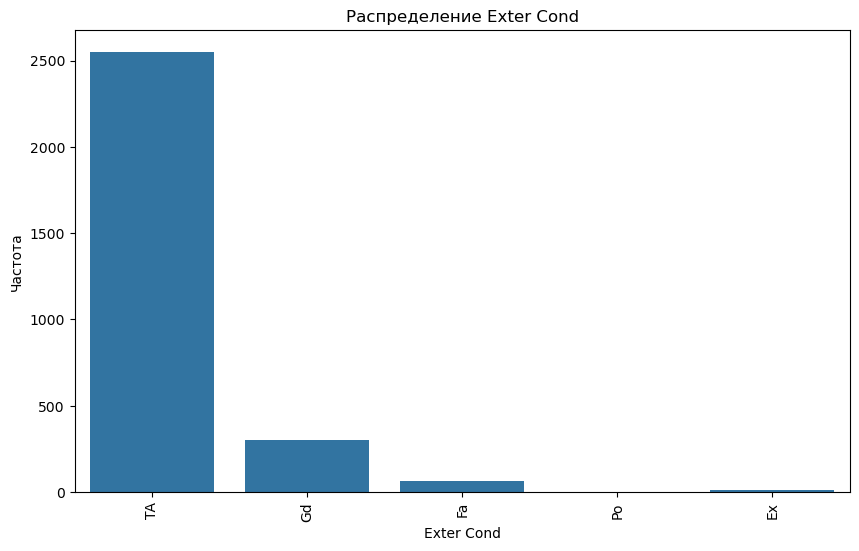

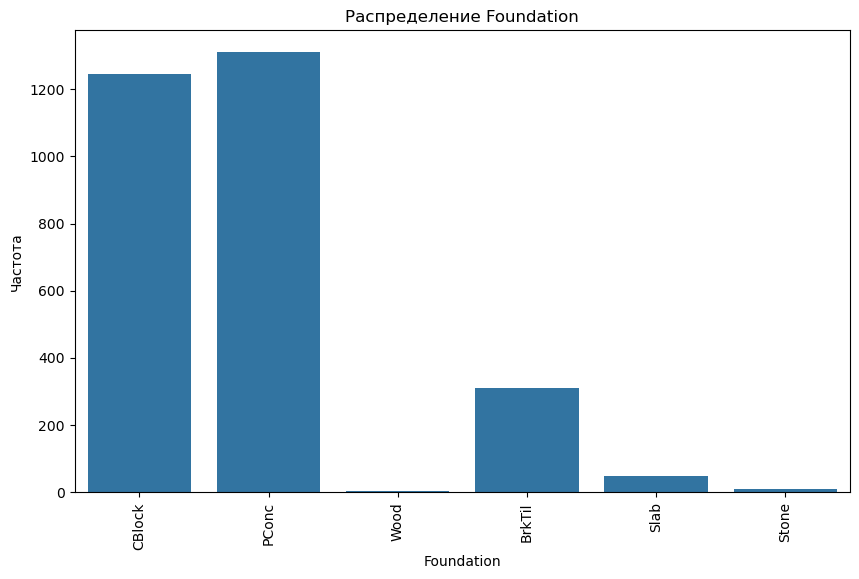

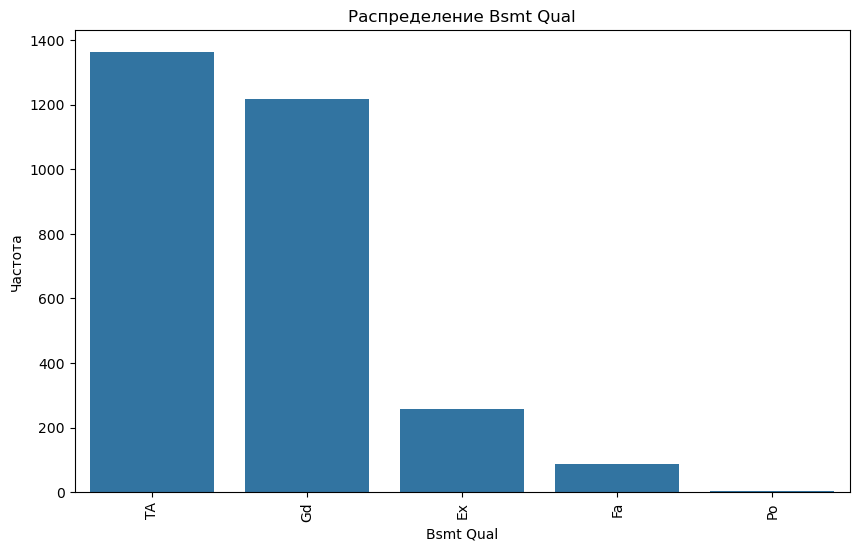

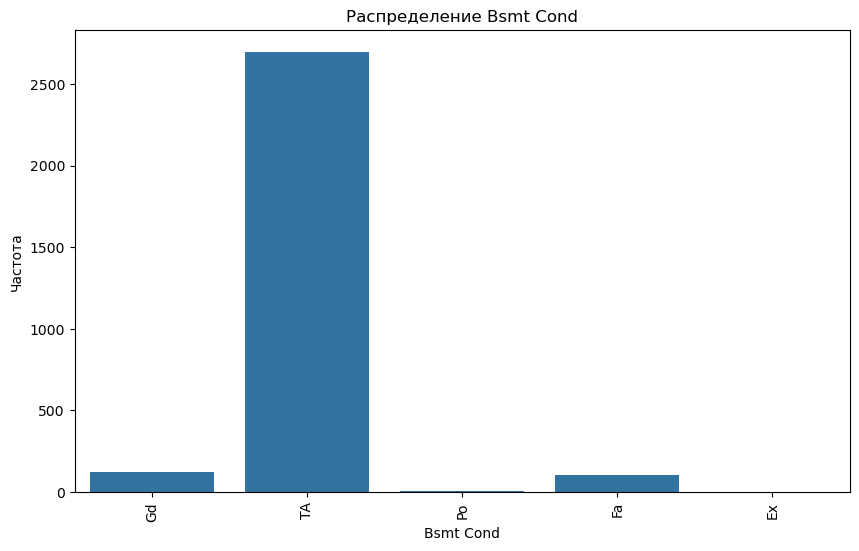

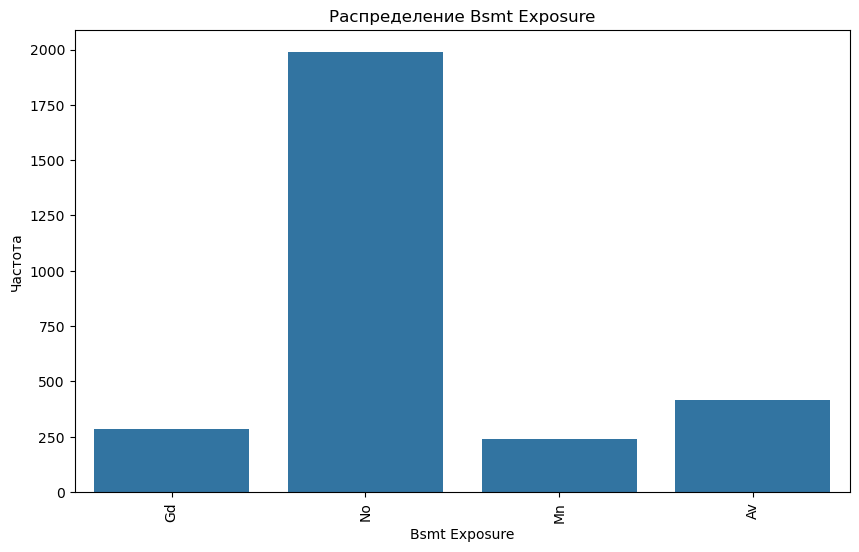

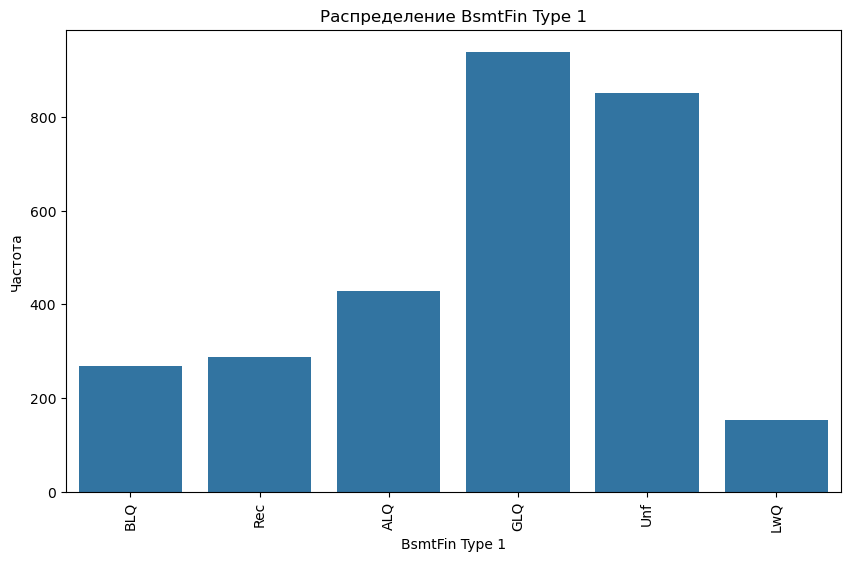

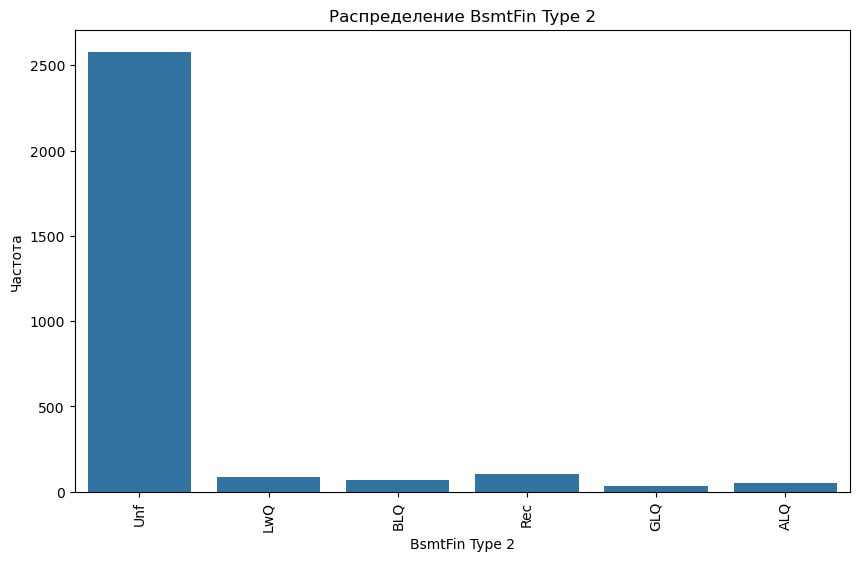

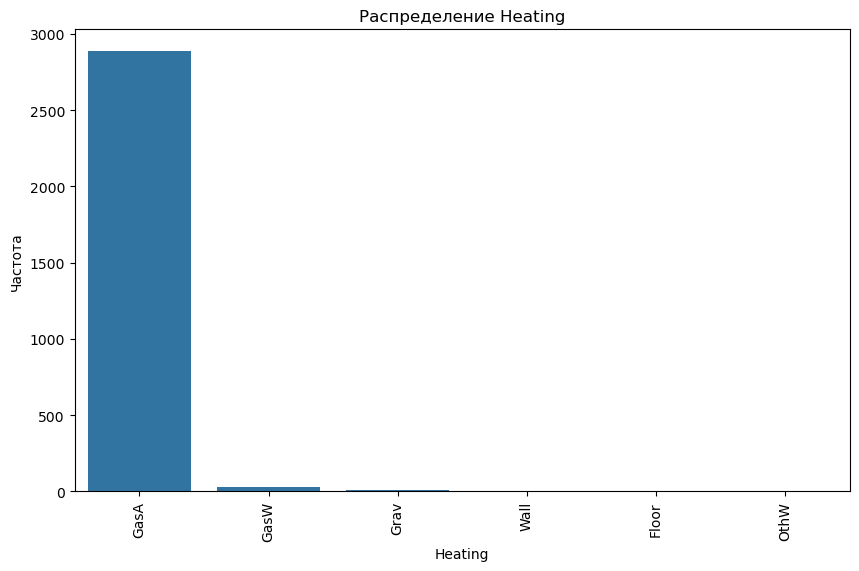

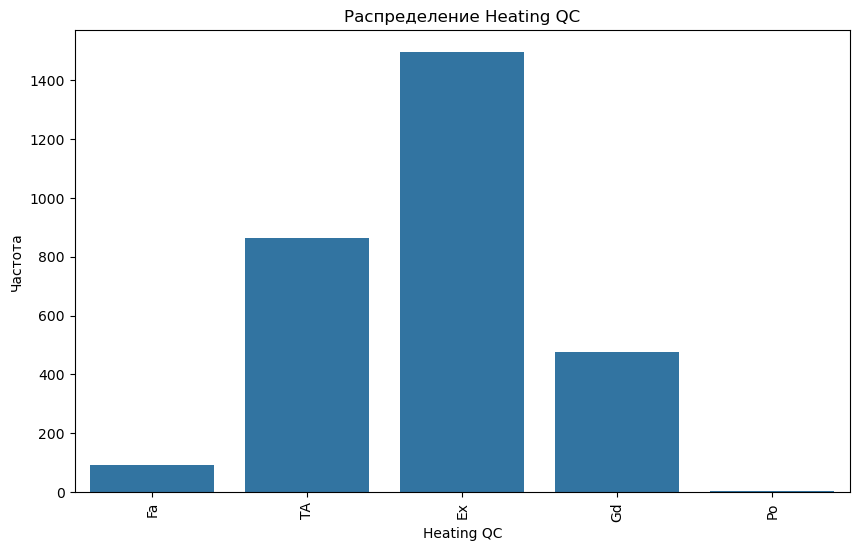

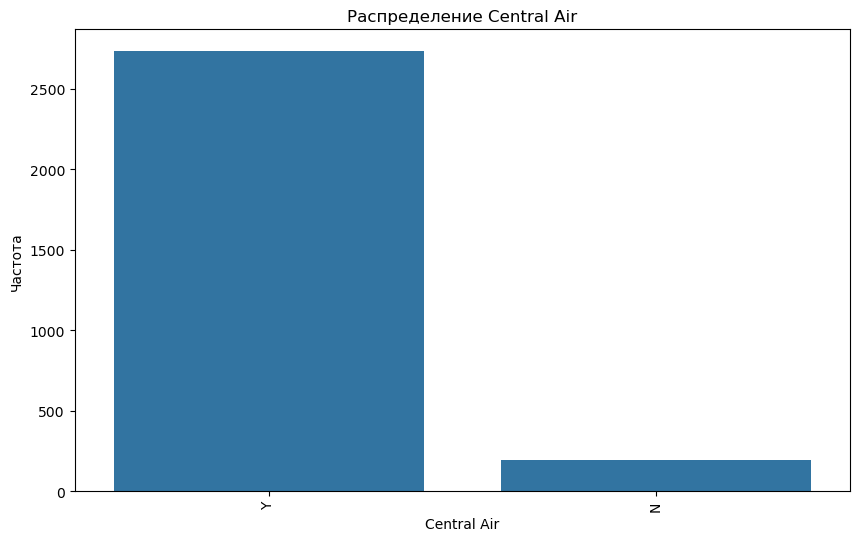

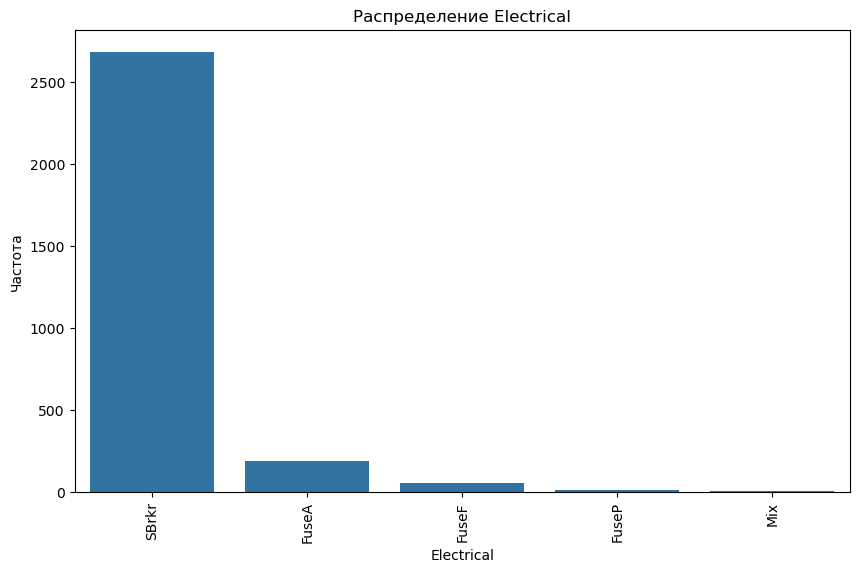

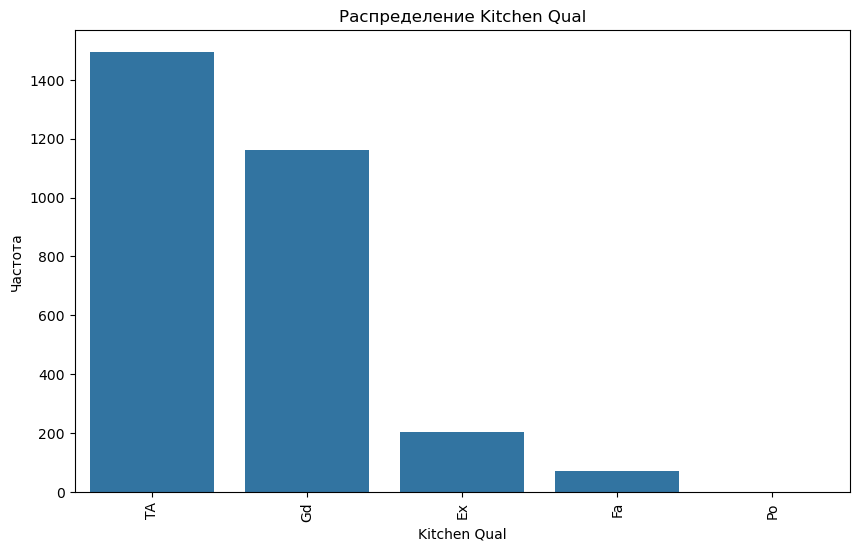

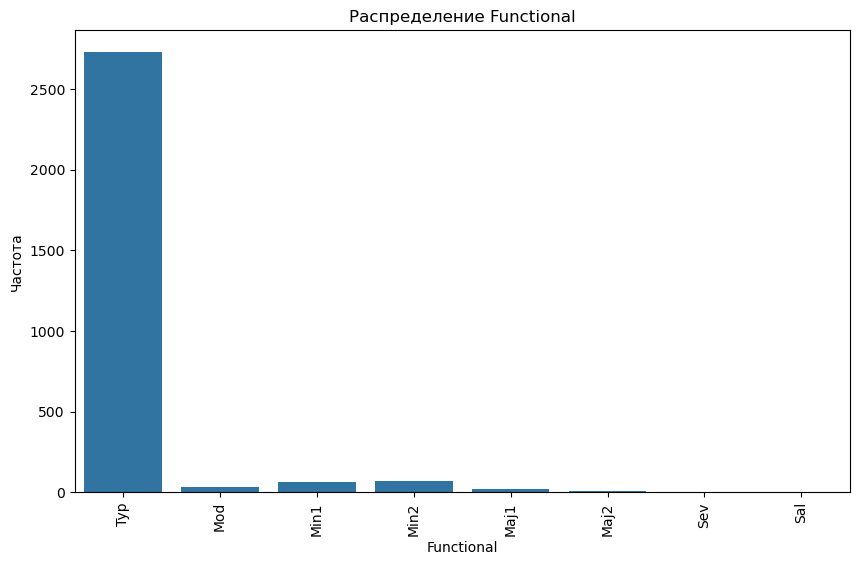

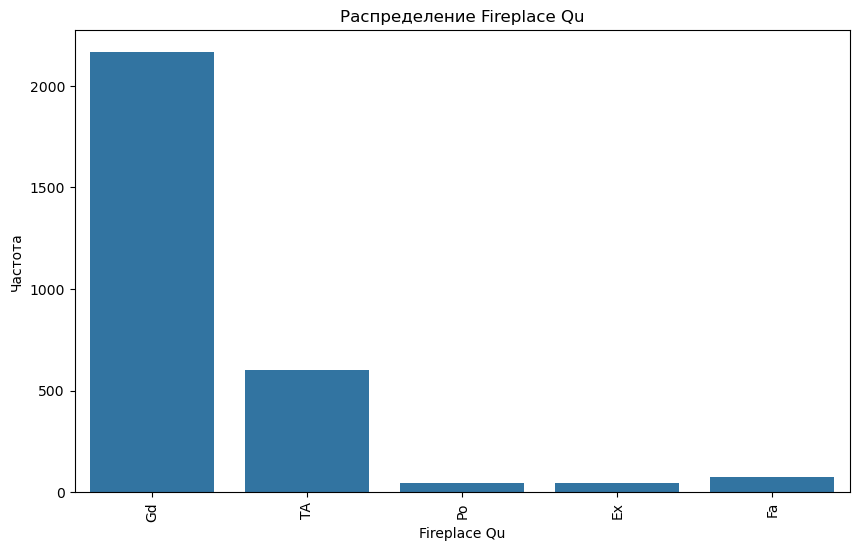

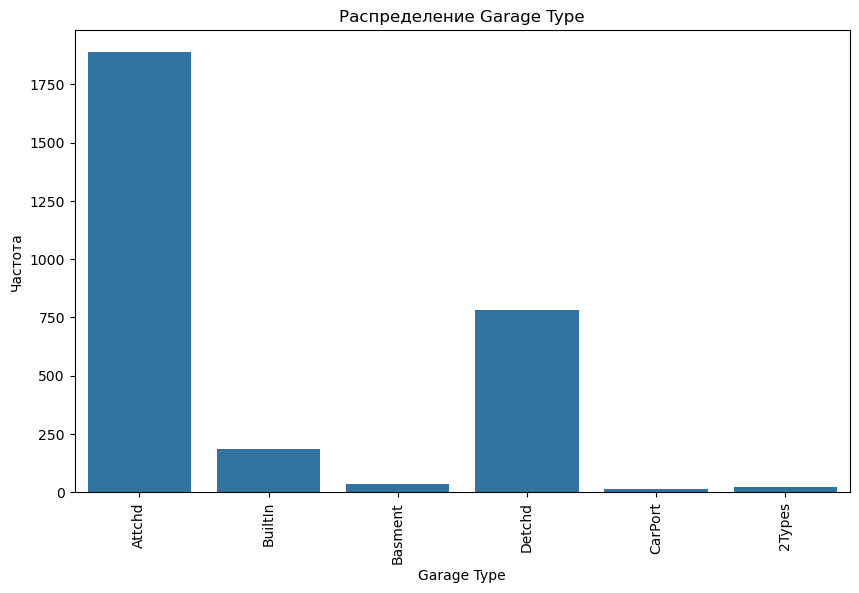

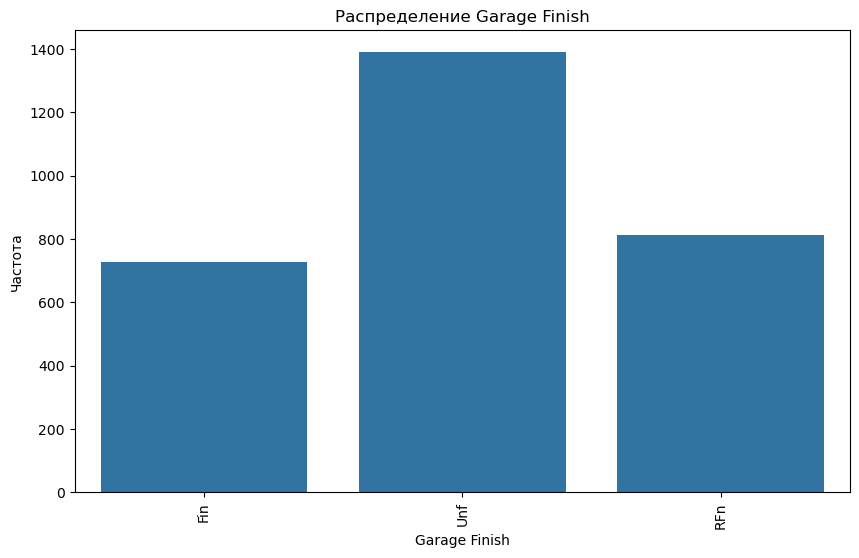

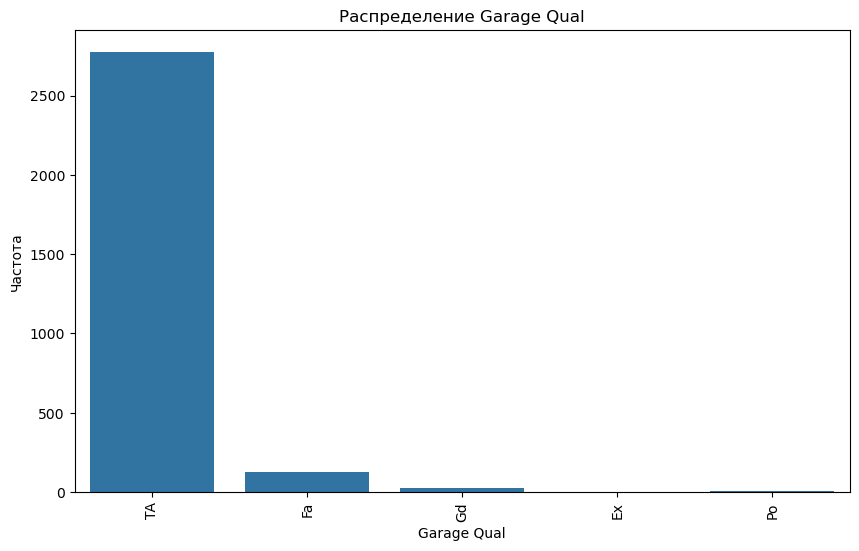

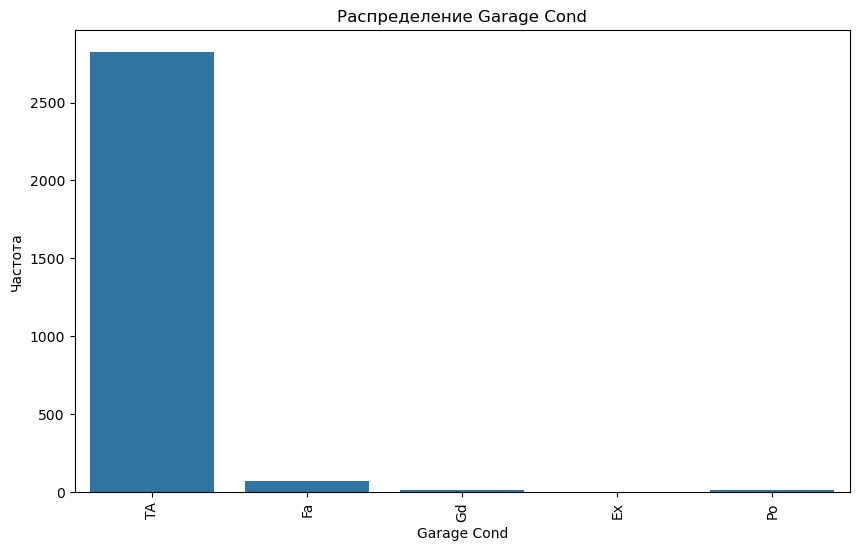

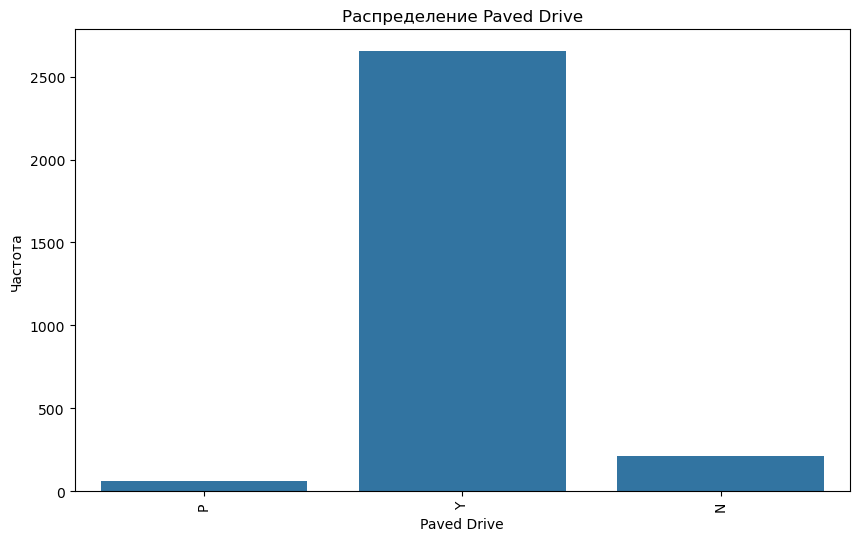

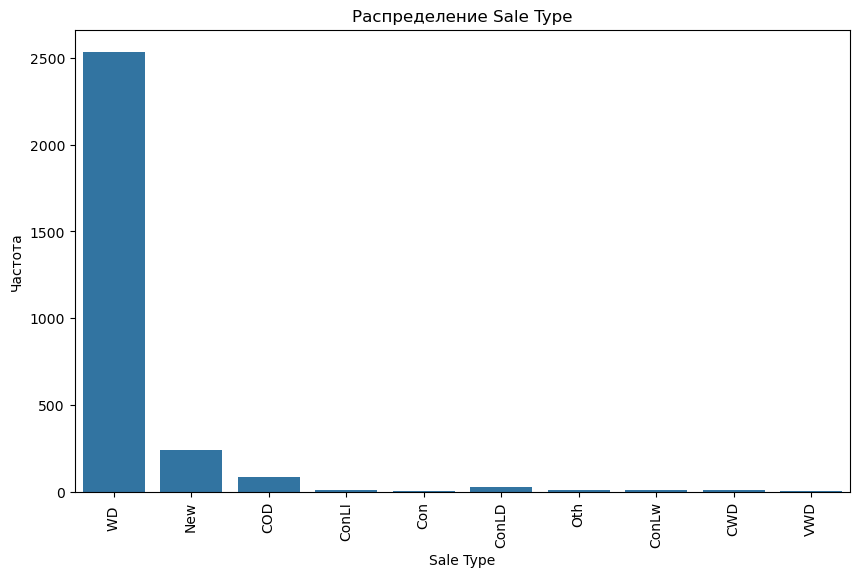

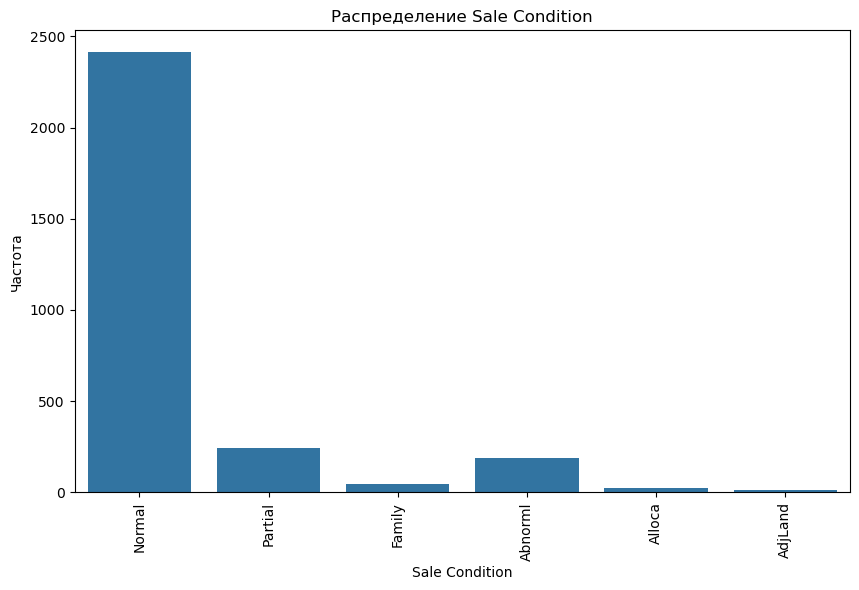

In [71]:
# Визуализация для числовых признаков
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
for column in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.show()

# Визуализация для категориальных признаков
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
for column in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=data_cleaned)
    plt.title(f'Распределение {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')
    plt.xticks(rotation=90)  
    plt.show()


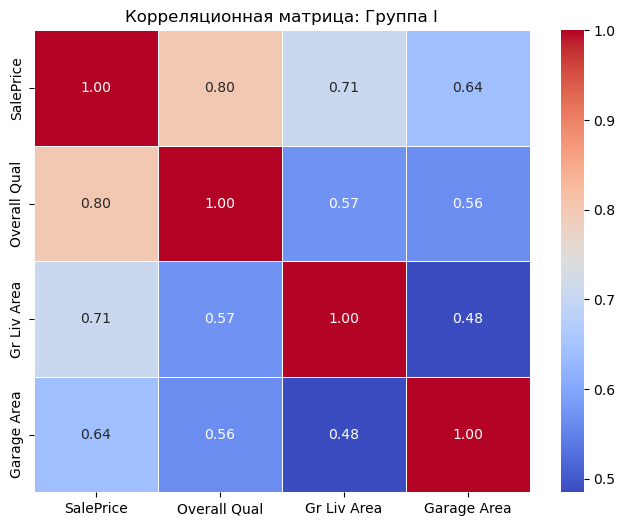

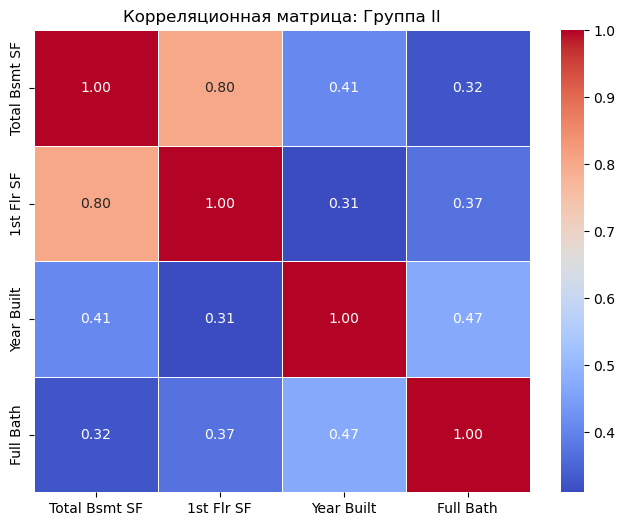

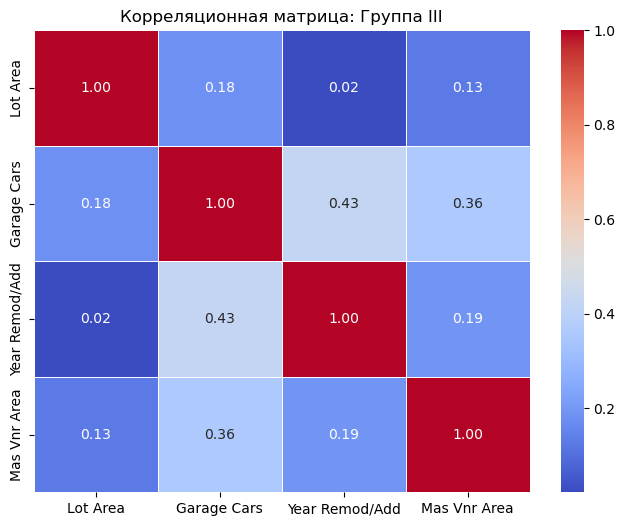

In [69]:
# Выбираем группы признаков для построения отдельных корреляционных матриц
group_I = ['SalePrice', 'Overall Qual', 'Gr Liv Area', 'Garage Area']
group_II = ['Total Bsmt SF', '1st Flr SF', 'Year Built', 'Full Bath']
group_III = ['Lot Area', 'Garage Cars', 'Year Remod/Add', 'Mas Vnr Area']

# Функция для построения корреляционной матрицы по группам
def plot_corr_matrix(data, features, title):
    plt.figure(figsize=(8, 6))
    corr_matrix = data[features].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(title)
    plt.show()

# Построим корреляционные матрицы для каждой группы
plot_corr_matrix(data_cleaned, group_I, 'Корреляционная матрица: Группа I')
plot_corr_matrix(data_cleaned, group_II, 'Корреляционная матрица: Группа II')
plot_corr_matrix(data_cleaned, group_III, 'Корреляционная матрица: Группа III')
